# Load the LGMR data (mean of the ensemble)

In [4]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')
ds_sat

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 ...
    sat_std  (age, lat, lon) float32 ...

# Crop the data for age>11

In [5]:

ds_sat = ds_sat.where(ds_sat.age>=14000, drop=True)

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [3]:
ds_sat

<xarray.Dataset>
Dimensions:  (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 1.11e+04 1.13e+04 1.15e+04 ... 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 -50.42 -50.41 -50.41 ... -41.98 -41.98
    sat_std  (age, lat, lon) float32 0.7924 0.7944 0.7947 ... 3.529 3.533 3.536

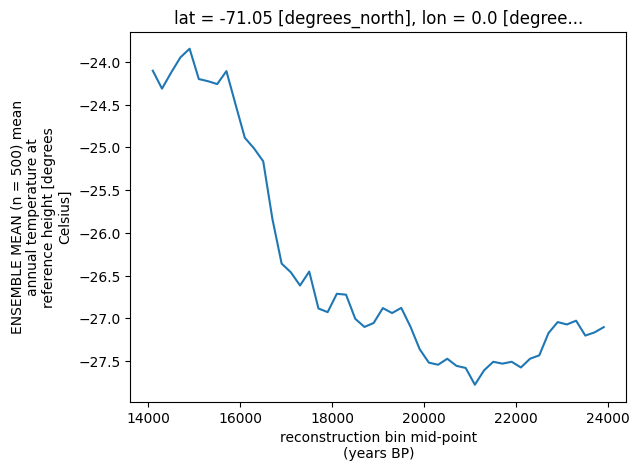

In [3]:
ds_sat['sat'].isel(lat=10).isel(lon=0).plot()

# Center and weight the data

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (50, 13824)


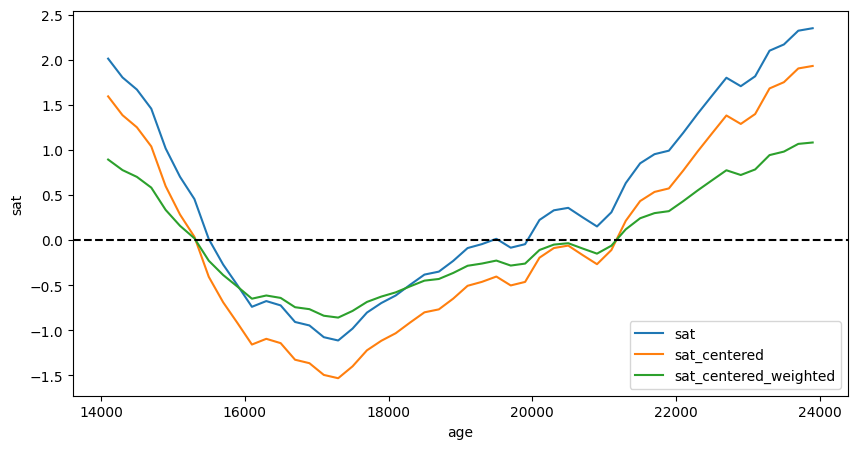

In [6]:
from toolbox import PCA_functions as pf
# 1. Center the Data
ds_sat = pf.center_data(ds_sat)

# 2. Weight the Data
ds_sat = pf.apply_weighting(ds_sat)

# 3. Plot the Centered and Weighted Data
lat_index = 77
lon_index = 90
pf.plot_sat_variables(ds_sat, lat_index, lon_index)


# PCA

shape of the reshaped sat_centered_weighted: (13824, 50)
shape of u, s, vh: (13824, 13824) (50,) (50, 50)
shape of EOFs: (13824, 2)
shape of PCs: (50, 2)
Explained variance: [6.9087273e-01 2.7686661e-01 1.4081990e-02 7.9770917e-03 3.7492465e-03
 2.0848040e-03 1.2548419e-03 7.8027707e-04 6.3050387e-04 3.6273419e-04
 3.2023349e-04 2.5993100e-04 2.0234540e-04 1.2076710e-04 8.4889398e-05
 7.0630638e-05 5.5111501e-05 4.4573597e-05 3.6388890e-05 3.0430276e-05
 2.5678864e-05 1.8224862e-05 1.3789796e-05 1.0624692e-05 9.5944742e-06
 7.7527002e-06 5.0980052e-06 3.8973726e-06 2.7266960e-06 2.5073728e-06
 2.1428336e-06 1.8861168e-06 1.7020600e-06 1.3982584e-06 1.1953463e-06
 1.0817608e-06 8.9914471e-07 6.6980419e-07 6.2356241e-07 4.9549550e-07
 4.2556047e-07 3.4099696e-07 3.0148908e-07 2.5093971e-07 1.8639047e-07
 1.3638802e-07 1.1958207e-07 8.1747586e-08 6.7086553e-08 2.9113140e-12]


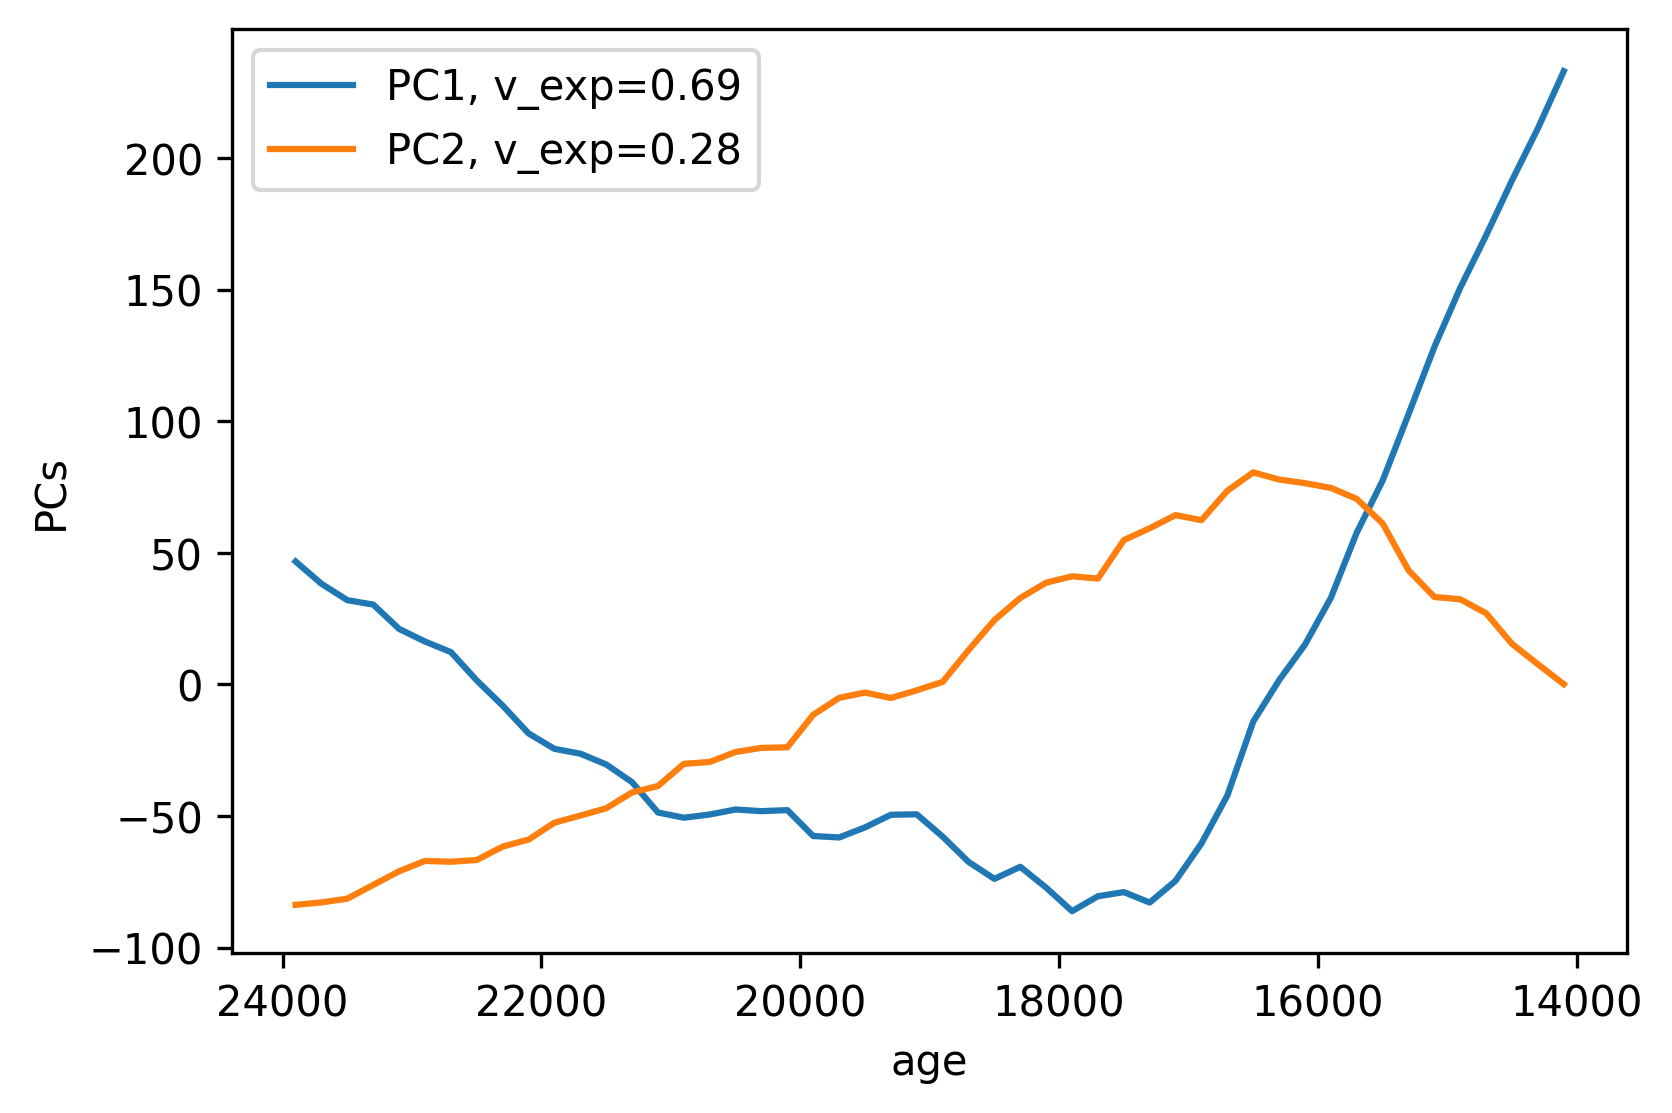

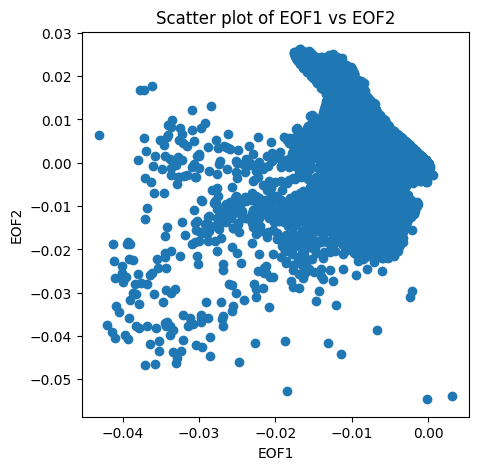

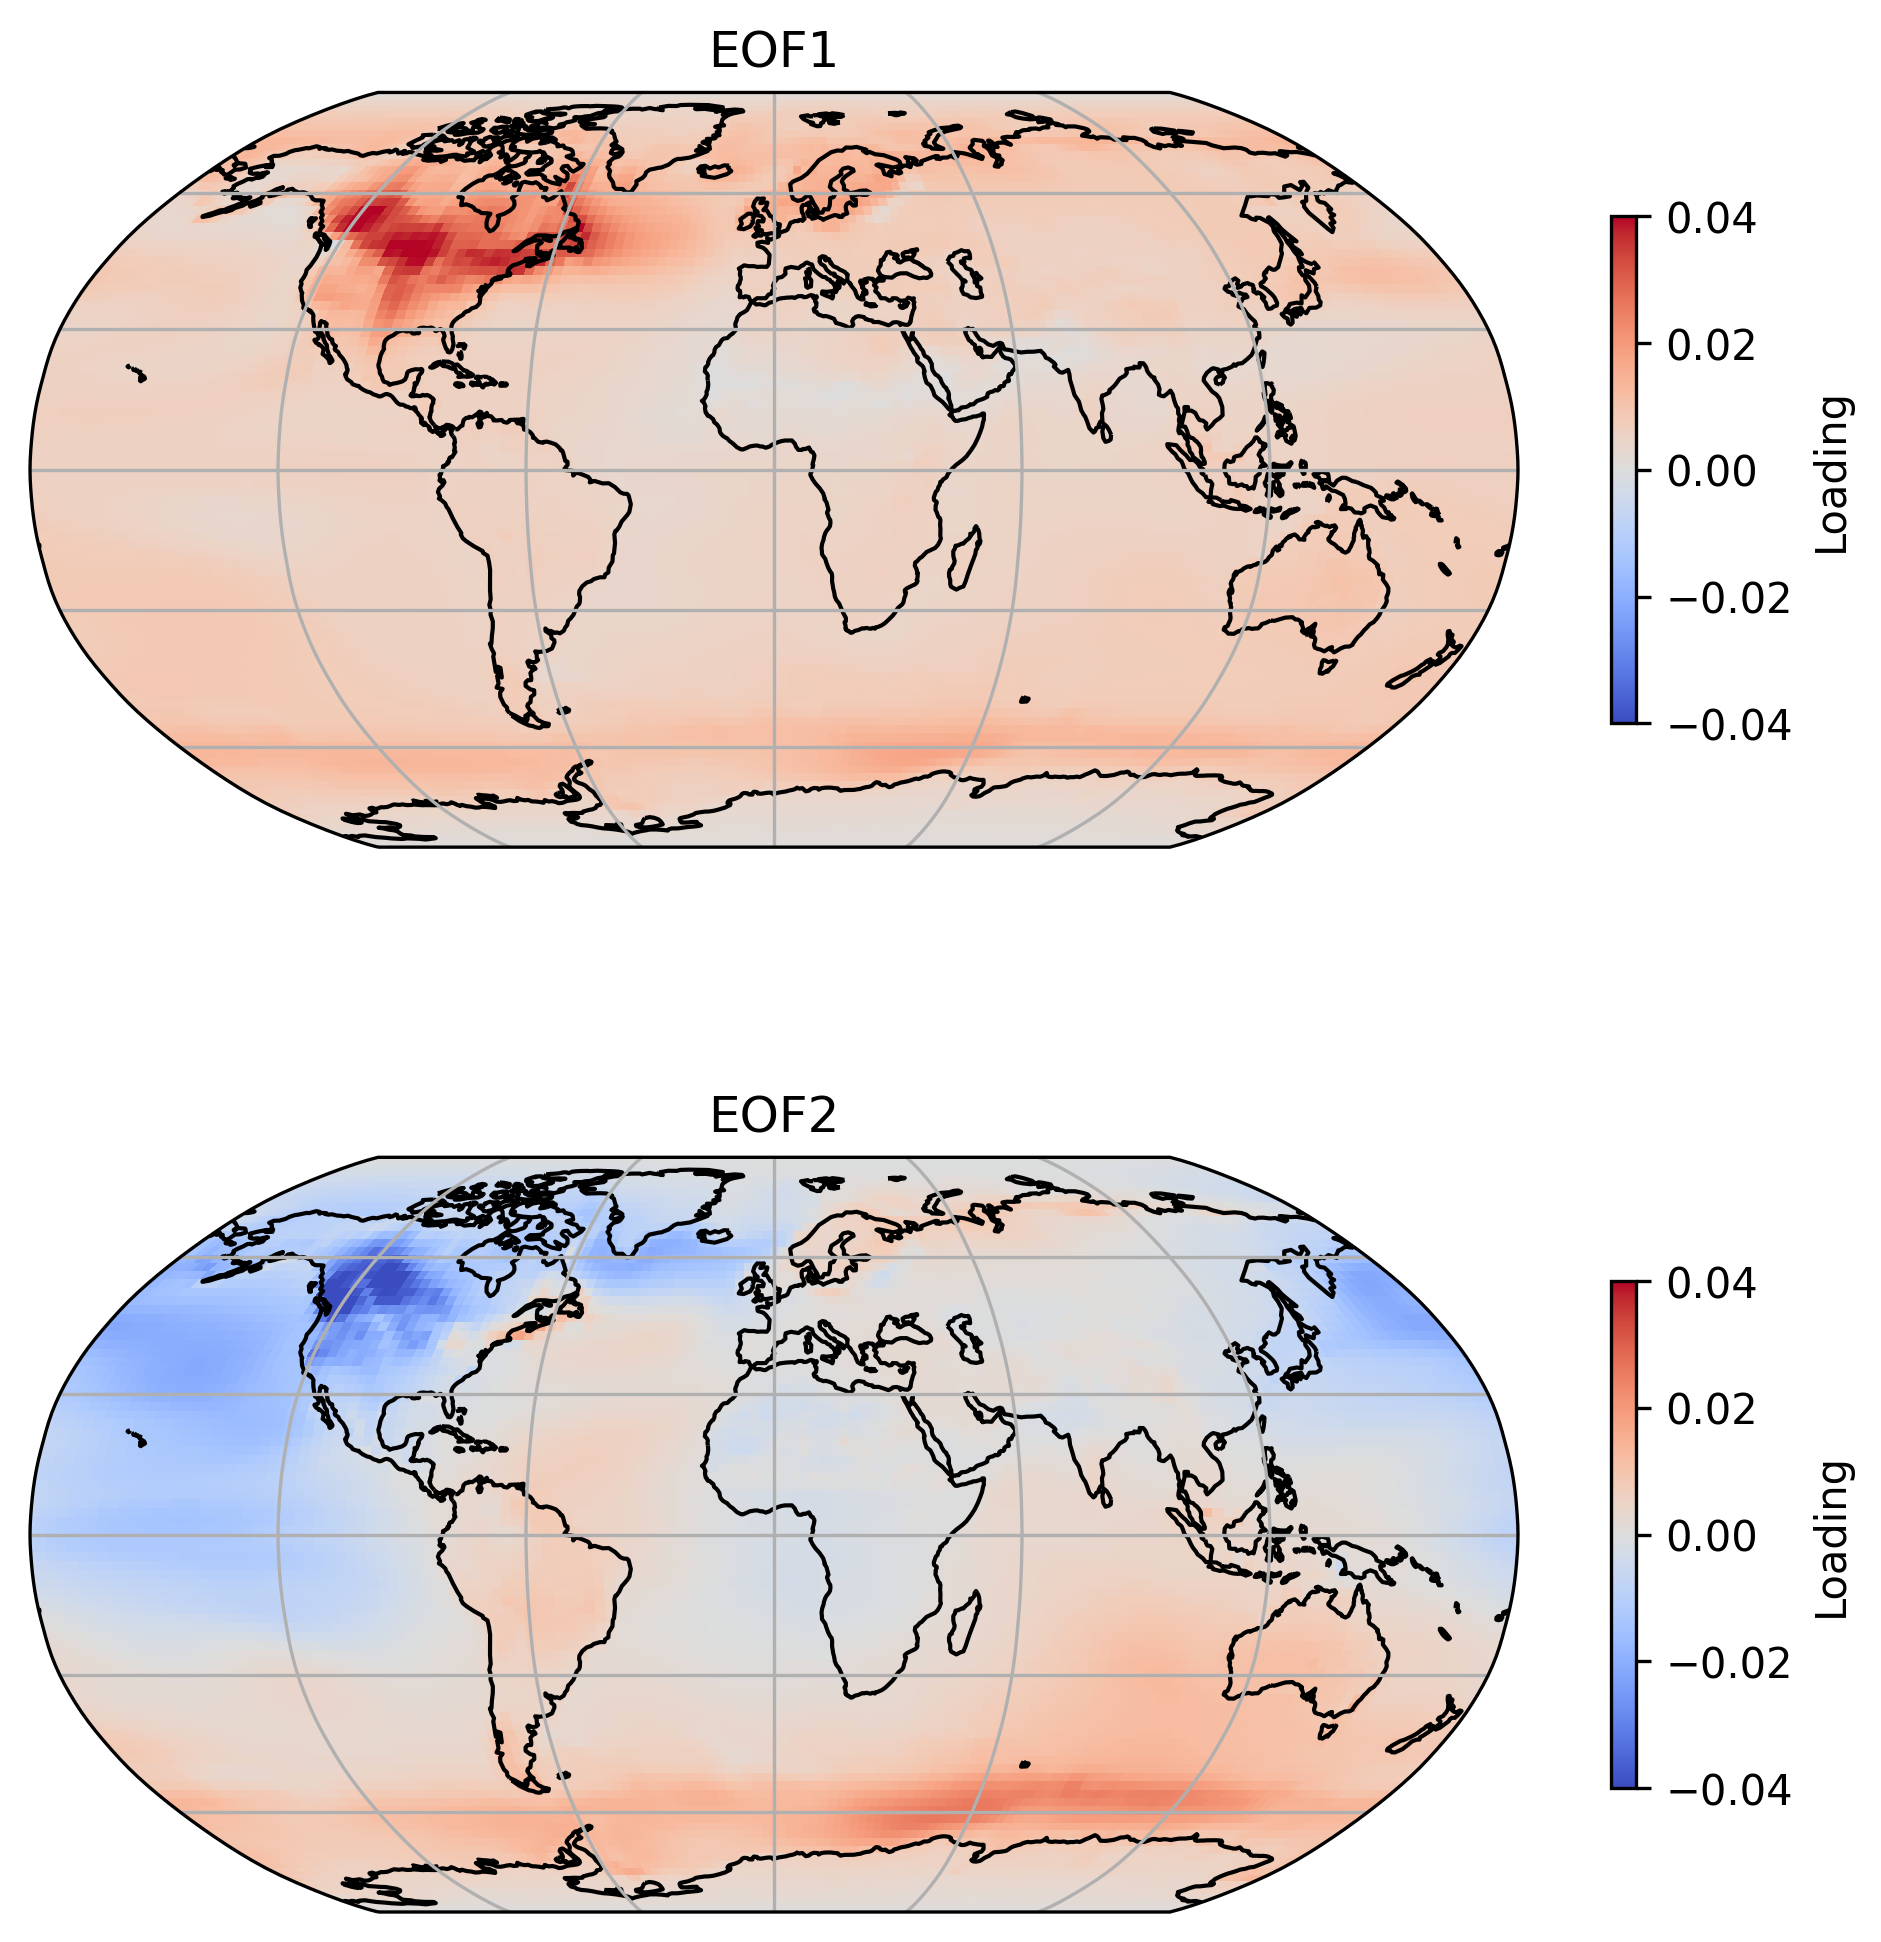

In [7]:
from toolbox import PCA_functions as pf
# 4. Perform PCA
exp_v_climo, eofs_climo, pcs_climo = pf.sat_PCA(ds_sat)
print('Explained variance:', exp_v_climo)

# 5. Plot pcs_climo
pf.plot_pcs(ds_sat['age'].values, pcs_climo, exp_v_climo)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs_climo)

# 7. Plot the EOF Map
pf.plot_eof_map(eofs_climo, ds_sat['lat'].values, ds_sat['lon'].values)

# Save the exp_v, eofs_climo and pcs_climo

In [5]:
# save exp_v_climo, eofs_climo, pcs
import pickle
pickle.dump(exp_v_climo, open('climo_ana_data/exp_v_climo.pkl', 'wb'))
pickle.dump(eofs_climo, open('climo_ana_data/eofs_climo.pkl', 'wb'))
pickle.dump(pcs_climo, open('climo_ana_data/pcs_climo.pkl', 'wb'))

In [1]:
# load exp_v_climo, eofs_climo, pcs
import pickle
exp_v_climo = pickle.load(open('climo_ana_data/exp_v_climo.pkl', 'rb'))
eofs_climo = pickle.load(open('climo_ana_data/eofs_climo.pkl', 'rb'))
pcs_climo = pickle.load(open('climo_ana_data/pcs_climo.pkl', 'rb'))

In [3]:
exp_v_climo*100

array([8.9825867e+01, 8.0483999e+00, 7.4023539e-01, 5.1995206e-01,
       2.6332024e-01, 2.1785228e-01, 1.6186684e-01, 7.4152134e-02,
       3.4315605e-02, 2.6706958e-02, 2.1478318e-02, 1.2564193e-02,
       1.0550613e-02, 8.9967437e-03, 6.9713811e-03, 5.7384386e-03,
       4.1115917e-03, 2.8584118e-03, 2.4036546e-03, 2.0493707e-03,
       1.5644553e-03, 1.3340838e-03, 1.0019765e-03, 9.0383709e-04,
       8.4651628e-04, 6.7388080e-04, 5.0681044e-04, 4.9417897e-04,
       3.9177571e-04, 3.2615650e-04, 2.6932854e-04, 2.5635958e-04,
       1.7211192e-04, 1.2916642e-04, 1.0862476e-04, 7.3377552e-05,
       6.6896166e-05, 6.3853891e-05, 5.4362856e-05, 4.8963346e-05,
       4.4990546e-05, 3.2448464e-05, 2.9971679e-05, 2.6412015e-05,
       2.1678274e-05, 1.9923848e-05, 1.7465552e-05, 1.5833735e-05,
       1.4228539e-05, 1.2340490e-05, 1.2109386e-05, 9.9231884e-06,
       9.2558057e-06, 7.1779459e-06, 6.5926843e-06, 5.1321640e-06,
       4.5338779e-06, 4.2131519e-06, 3.7891439e-06, 3.0883889e

# PCA, using sklearn

shape of the reshaped sat_centered_weighted: (65, 13824)
shape of PCs: (65, 2)
Explained variance: [0.89825857 0.08048399]
shape of EOFs: (13824, 2)
Explained variance: [0.89825857 0.08048399]


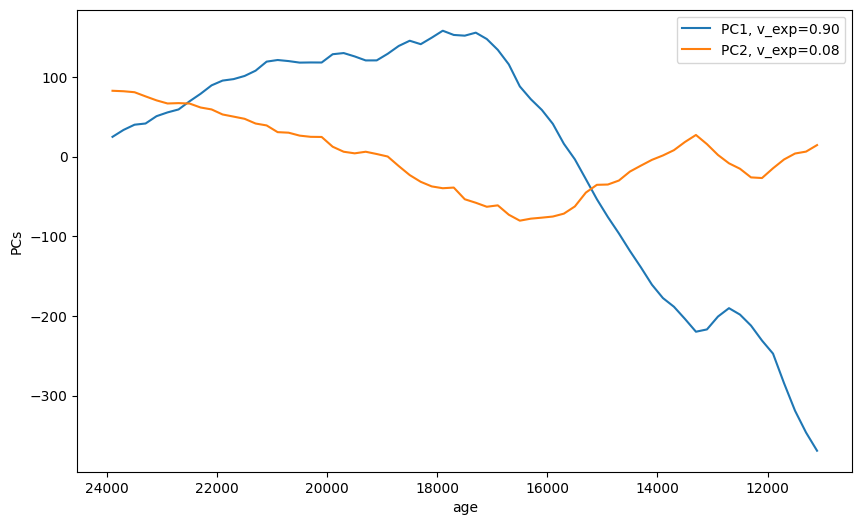

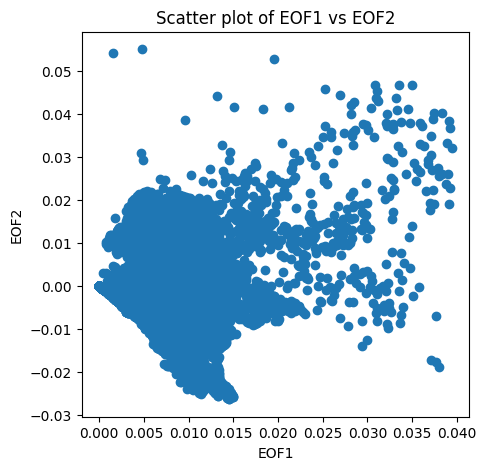

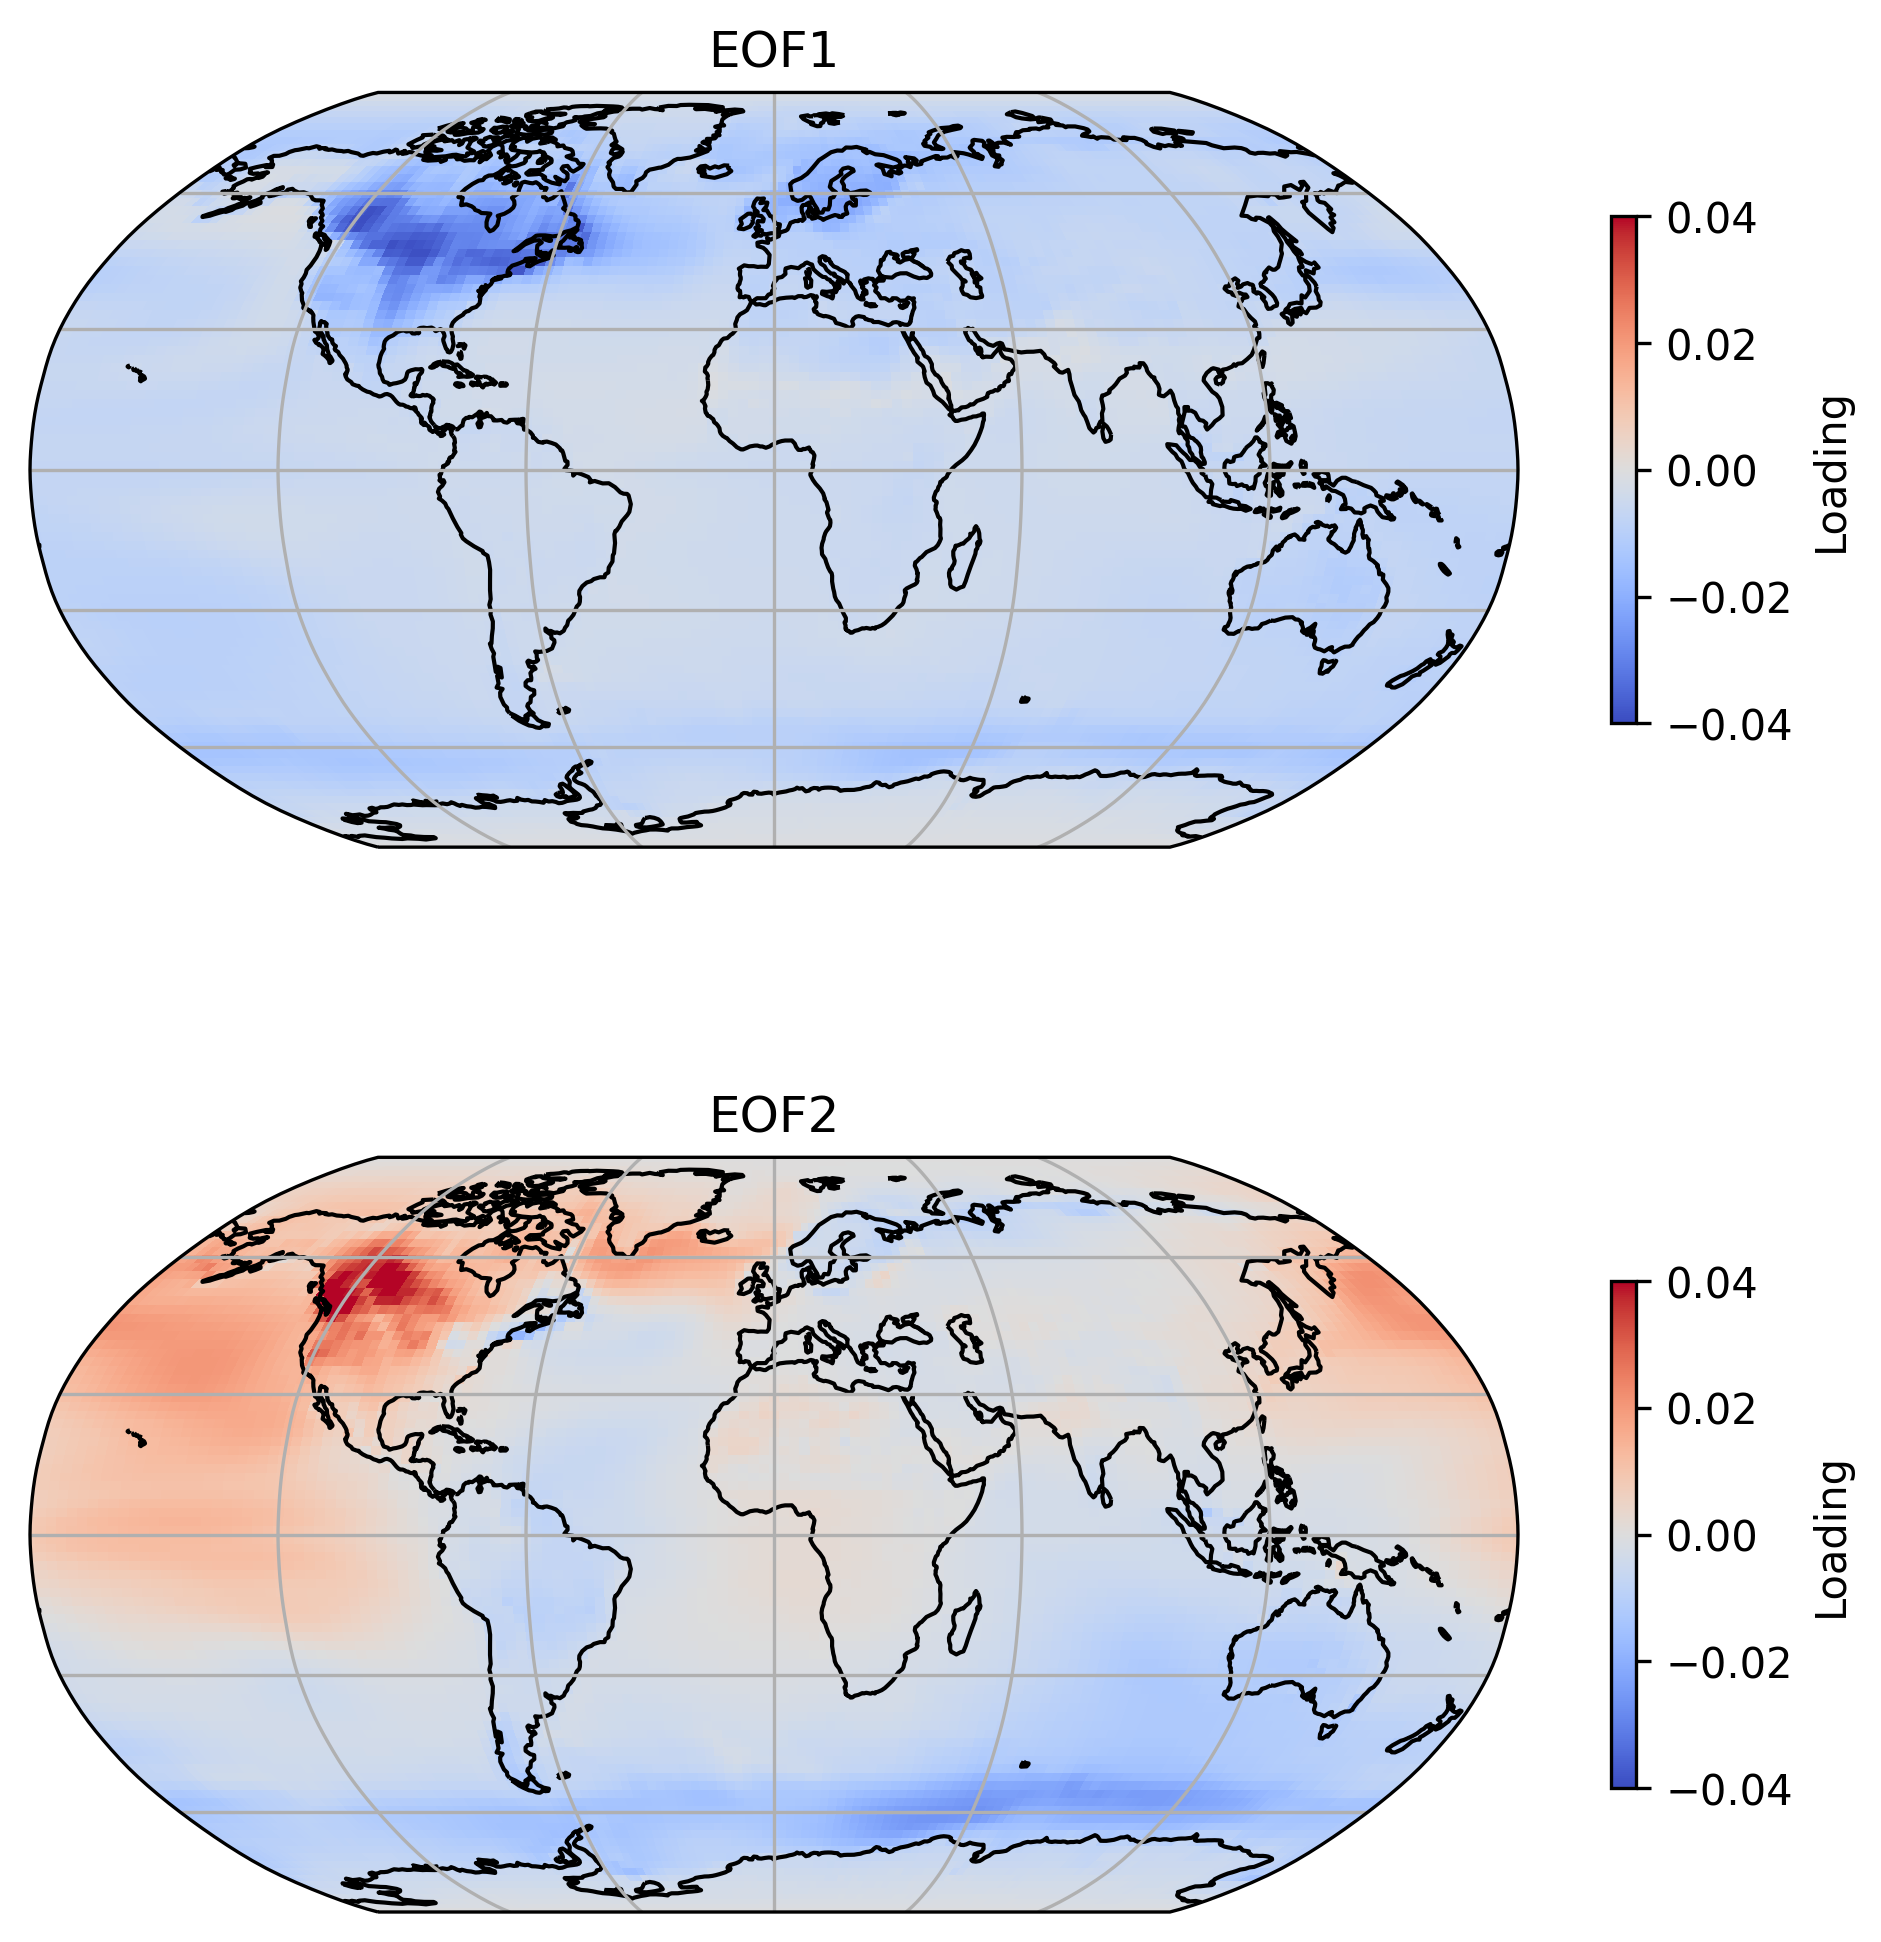

In [5]:
from toolbox import PCA_functions as pf
# 4. Perform PCA
exp_v_climo_sk, eofs_climo_sk, pcs_climo_sk = pf.sat_PCA_sklearn(ds_sat)
print('Explained variance:', exp_v_climo_sk)

# Plot PCs
pf.plot_pcs(ds_sat['age'].values, pcs_climo_sk, exp_v_climo_sk)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs_climo_sk)

# 7. Plot the EOF Map
pf.plot_eof_map(eofs_climo_sk, ds_sat['lat'].values, ds_sat['lon'].values)

# Save the data

In [7]:
# save exp_v_climo_sk, eofs_climo_sk, pcs_climo_sk
import pickle
pickle.dump(exp_v_climo_sk, open('climo_ana_data/exp_v_climo_sk.pkl', 'wb'))
pickle.dump(eofs_climo_sk, open('climo_ana_data/eofs_climo_sk.pkl', 'wb'))
pickle.dump(pcs_climo_sk, open('climo_ana_data/pcs_climo_sk.pkl', 'wb'))

In [ ]:
# read exp_v_climo_sk, eofs_climo_sk, pcs_climo_sk
import pickle
exp_v_climo_sk = pickle.load(open('climo_ana_data/exp_v_climo_sk.pkl', 'rb'))
eofs_climo_sk = pickle.load(open('climo_ana_data/eofs_climo_sk.pkl', 'rb'))
pcs_climo_sk = pickle.load(open('climo_ana_data/pcs_climo_sk.pkl', 'rb'))

# GMM

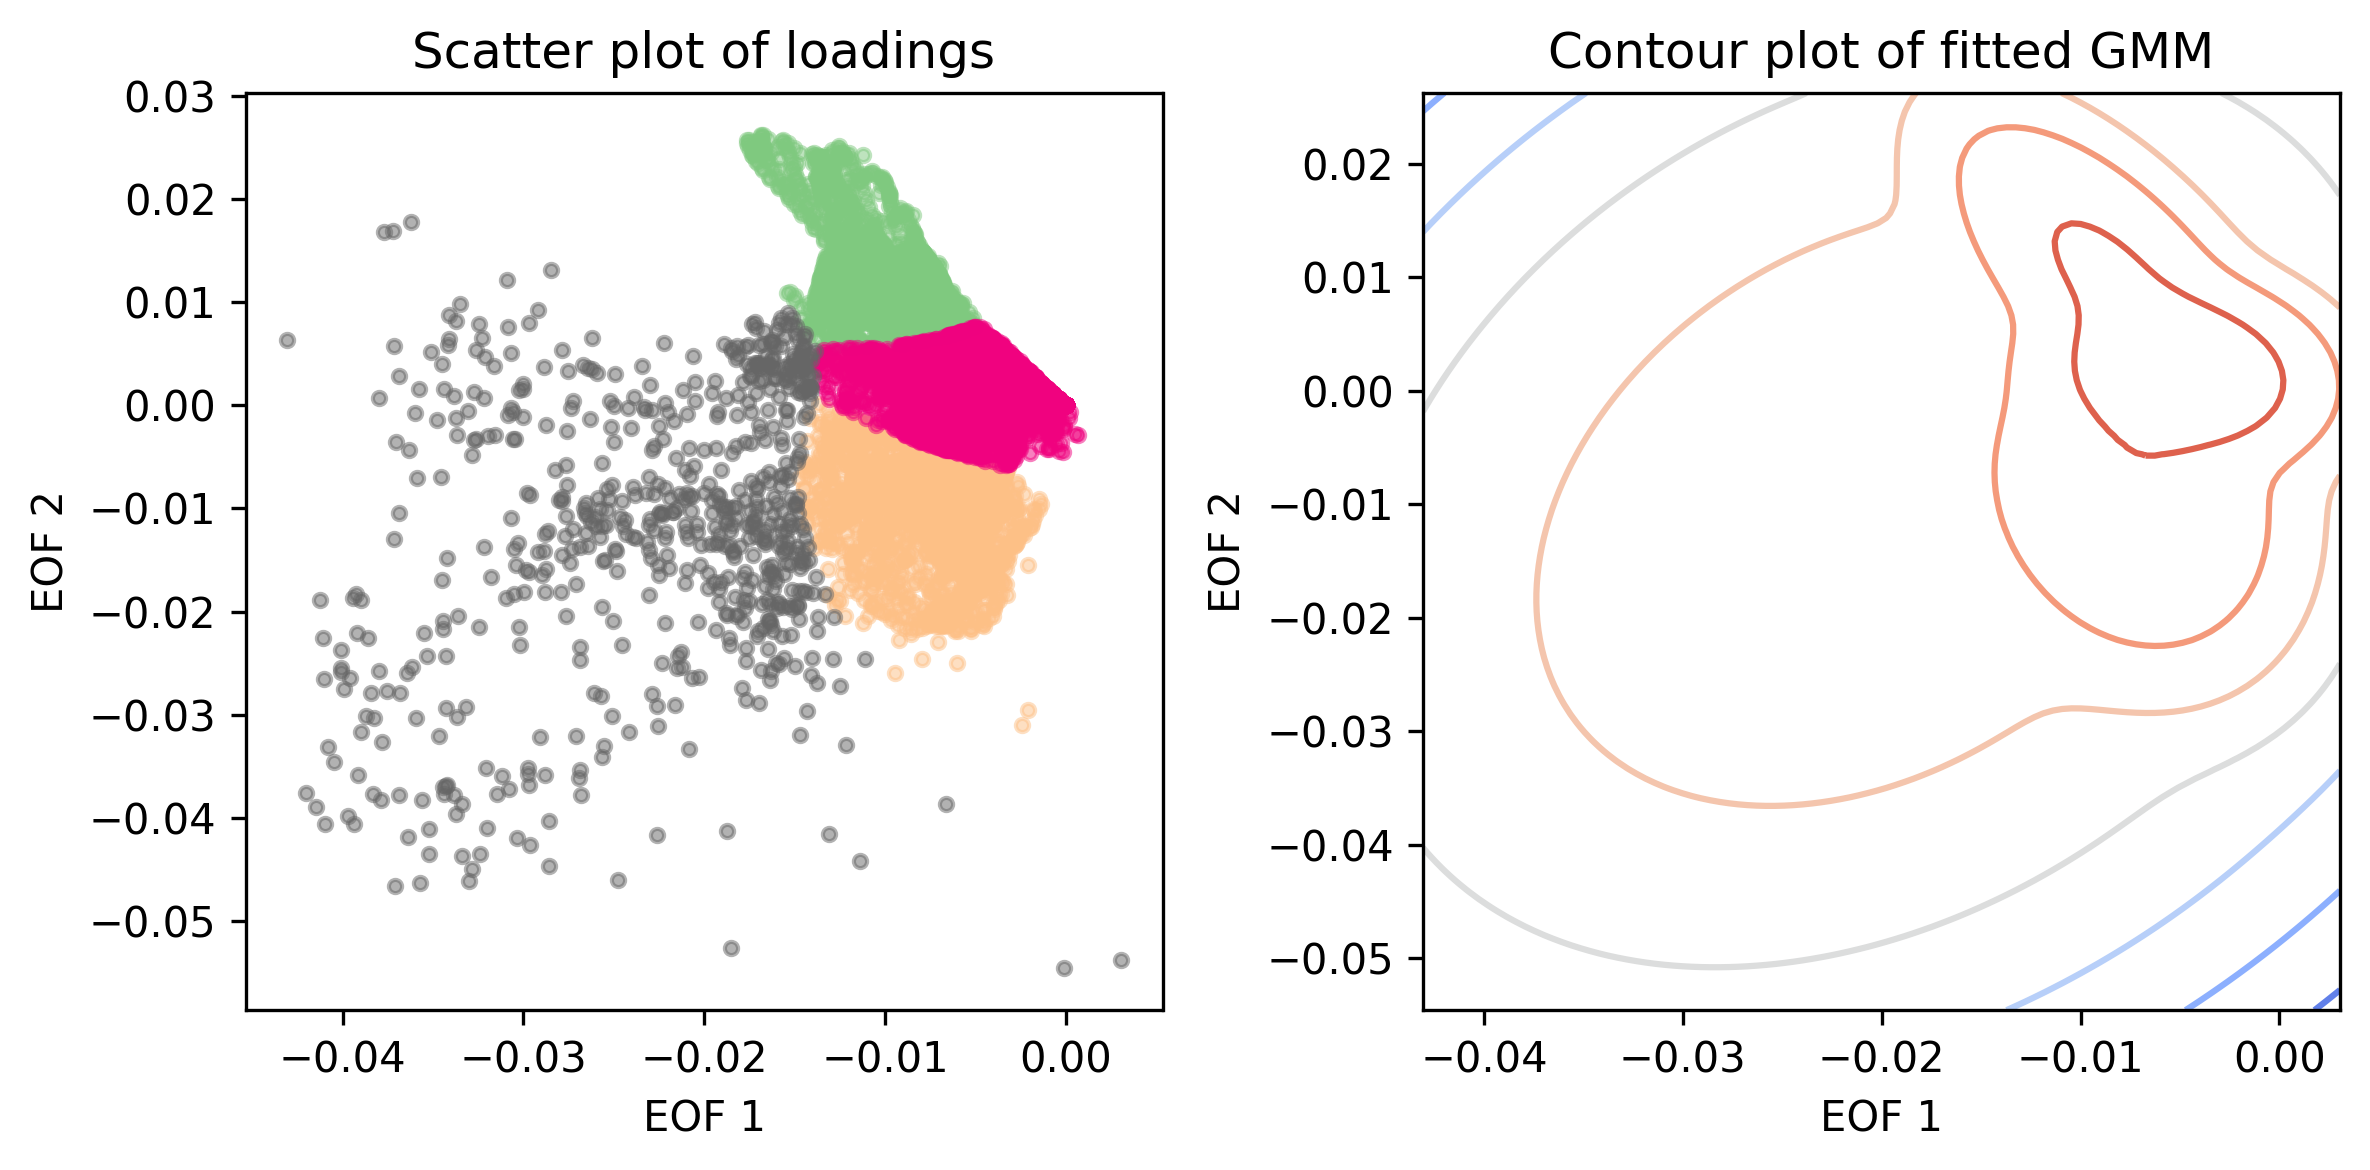

In [8]:
from toolbox import GMM_functions_single as gfs
ds_GMM_climo=gfs.GMM4EOFS(eofs_climo, ds_sat,n_components=4)

# Store the GMM results

In [8]:
# save the ds_EOFs_GMM
ds_GMM_climo.to_netcdf('climo_ana_data/ds_GMM_climo.nc')

In [4]:
# load the ds_EOFs_GMM
import xarray as xr
ds_GMM_climo = xr.open_dataset('climo_ana_data/ds_GMM_climo.nc')

# Plot the spatial distribution of labels

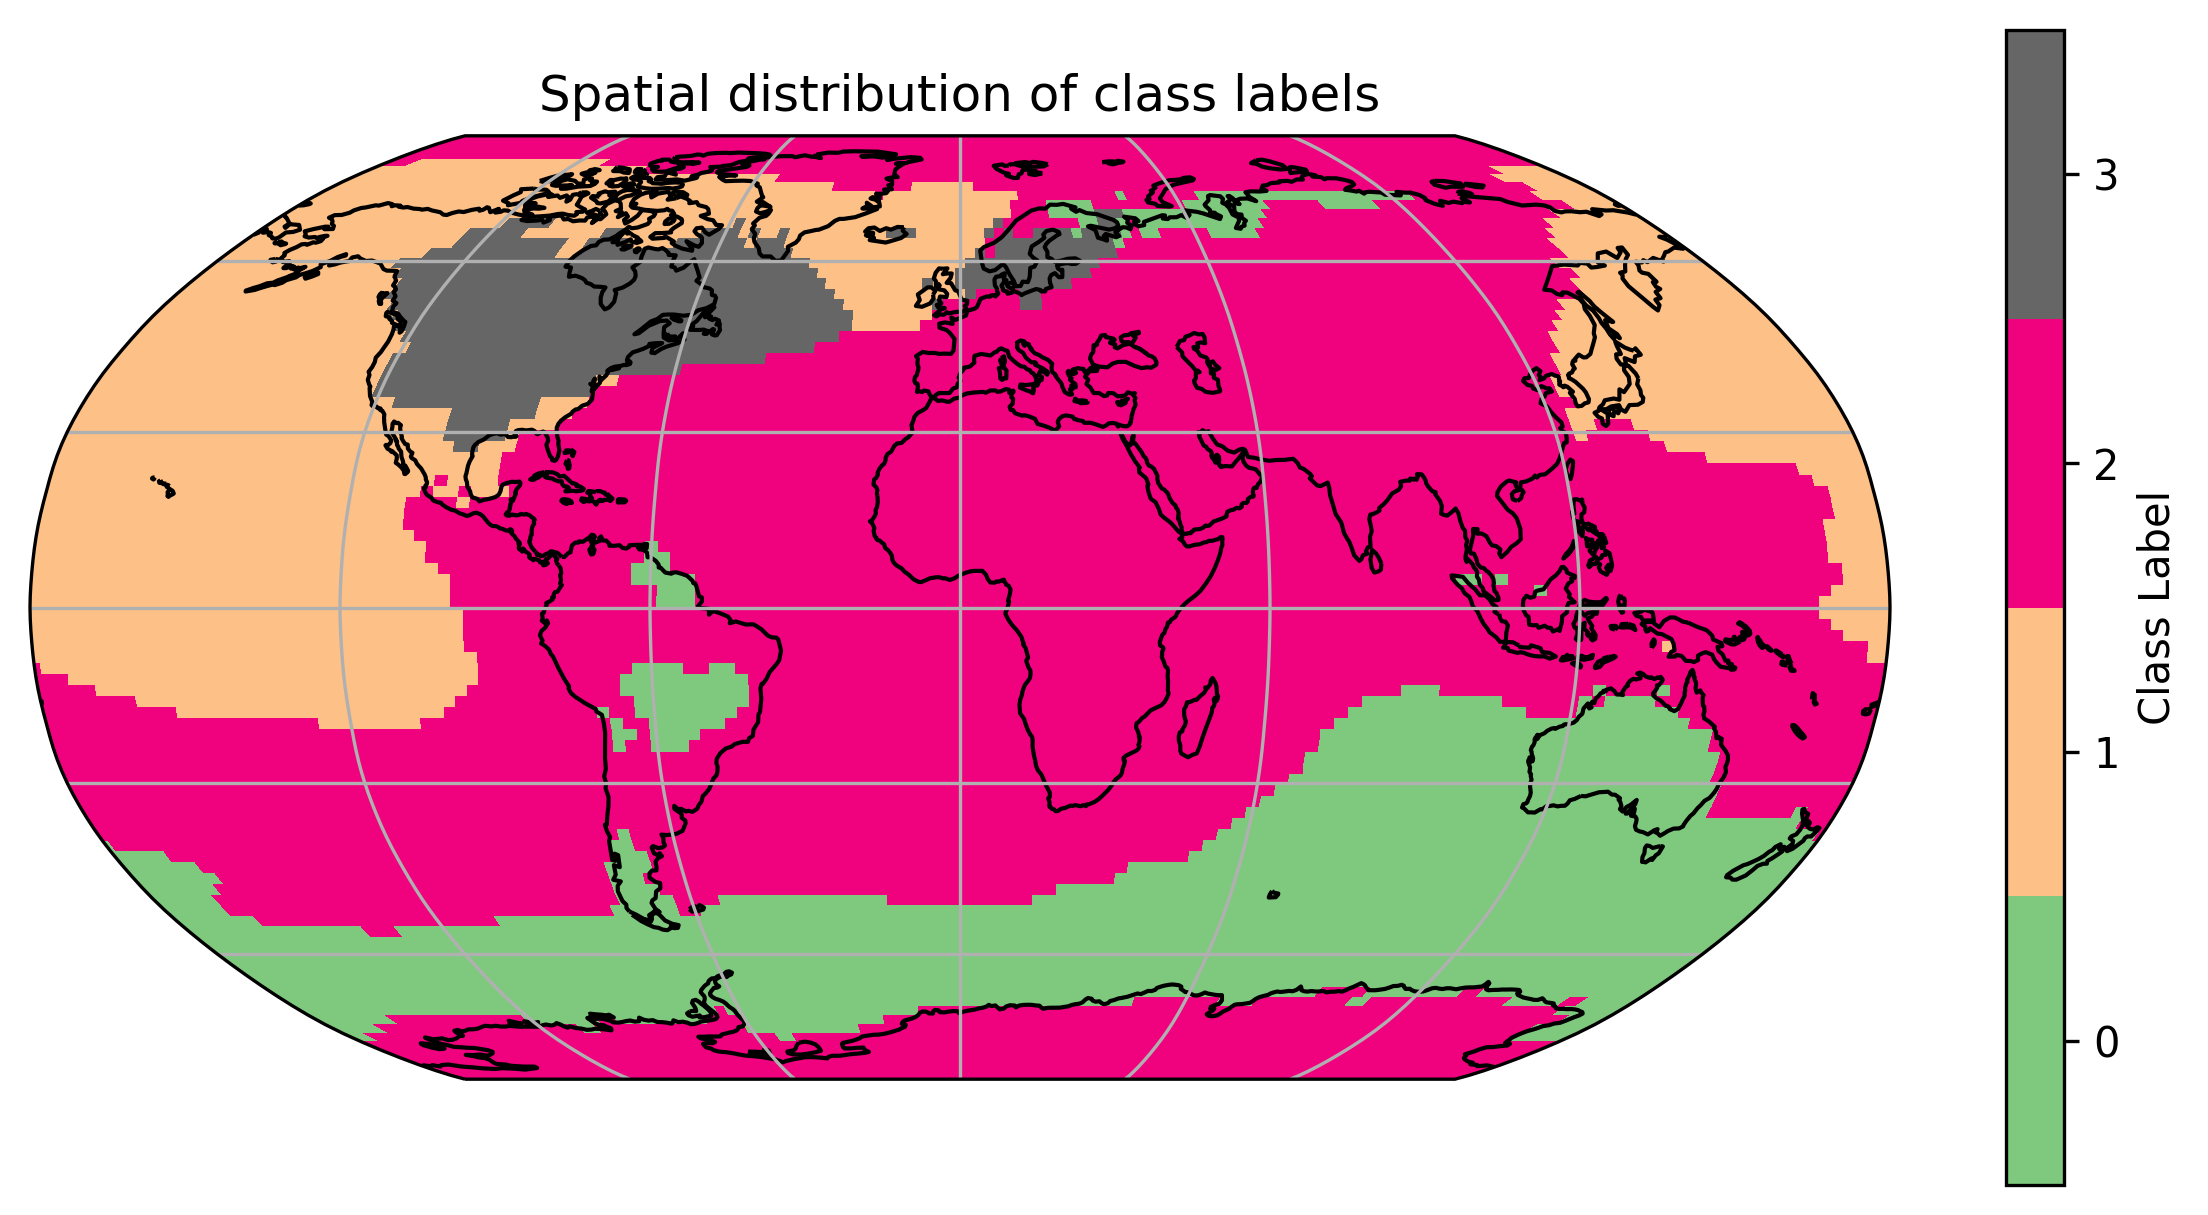

In [9]:
from toolbox import GMM_functions_single as gfs
gfs.plot_labels(ds_GMM_climo)

# Plot the weighted average curves

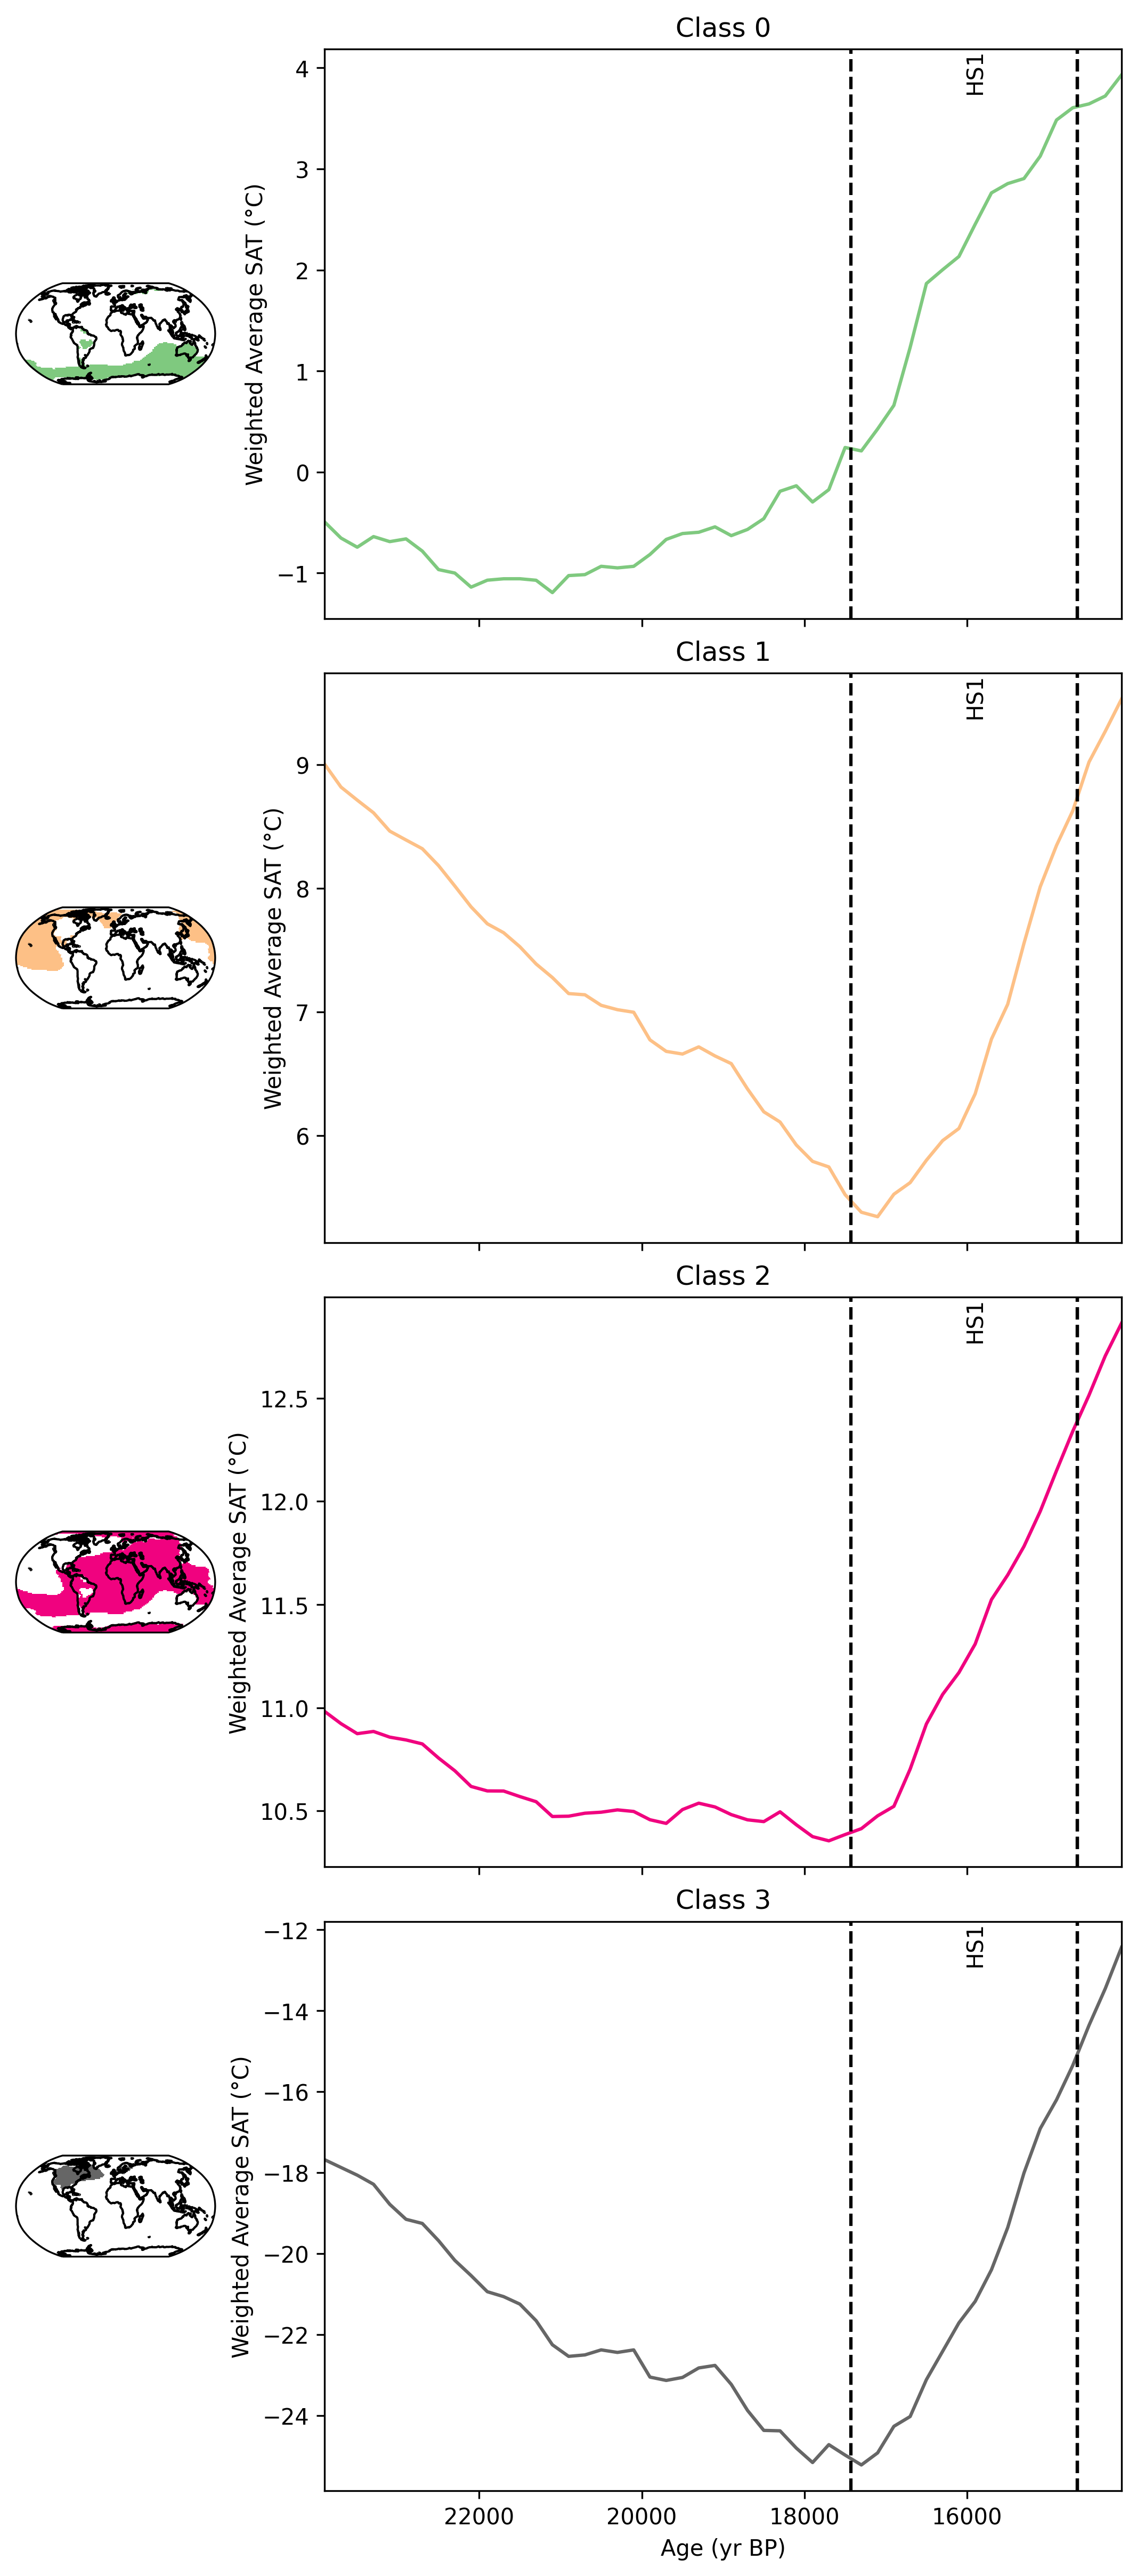

In [23]:
from toolbox import GMM_functions_single as gfs
uncor_weighted_avg=gfs.plot_weighted_average_curve(ds_GMM_climo.copy(), dpi=300)

In [5]:
# store the uncor_weighted_avg
import pickle
pickle.dump(uncor_weighted_avg, open('climo_ana_data/uncor_weighted_avg.pkl', 'wb'))

In [1]:
# load the uncor_weighted_avg
import pickle
uncor_weighted_avg = pickle.load(open('climo_ana_data/uncor_weighted_avg.pkl', 'rb'))

# Find change points


INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast.irreg(),set print.options = 0 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast.irreg(),      set quiet = 1 

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 40
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 (unknown unit)
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Error (experimental) is fitted instead of Y=Trend+Error 
Detrend       : False | I

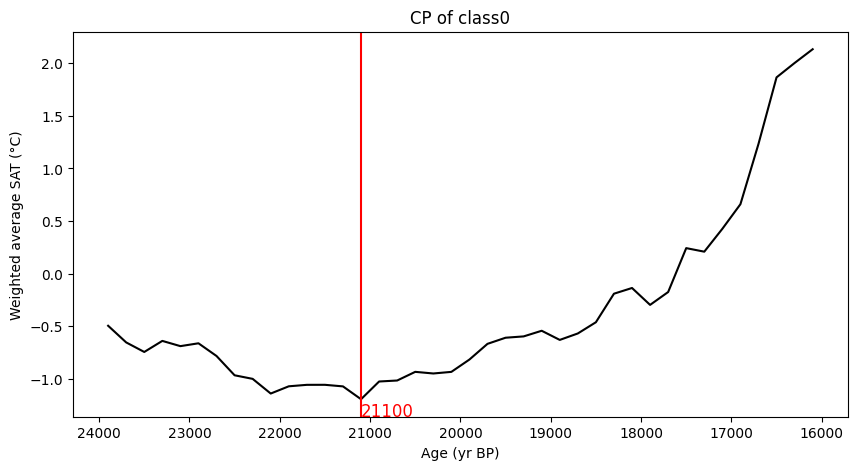

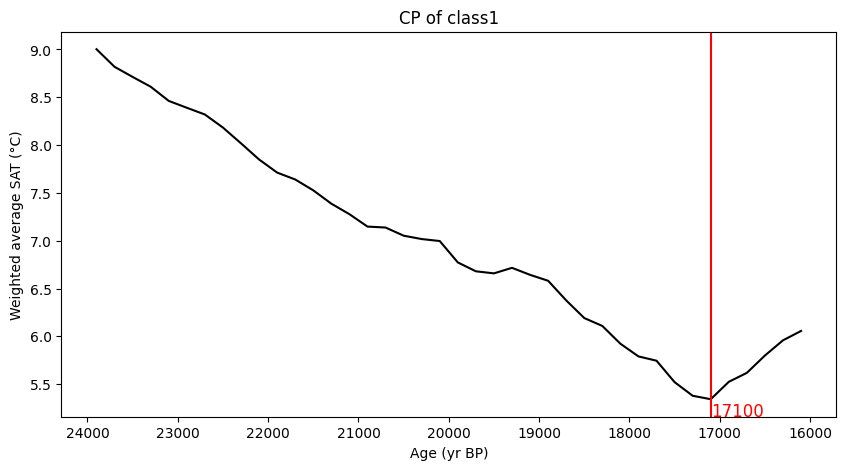

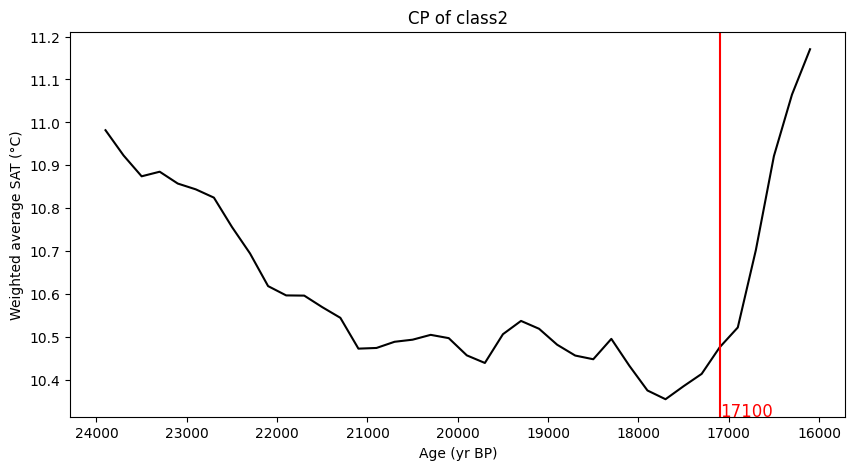

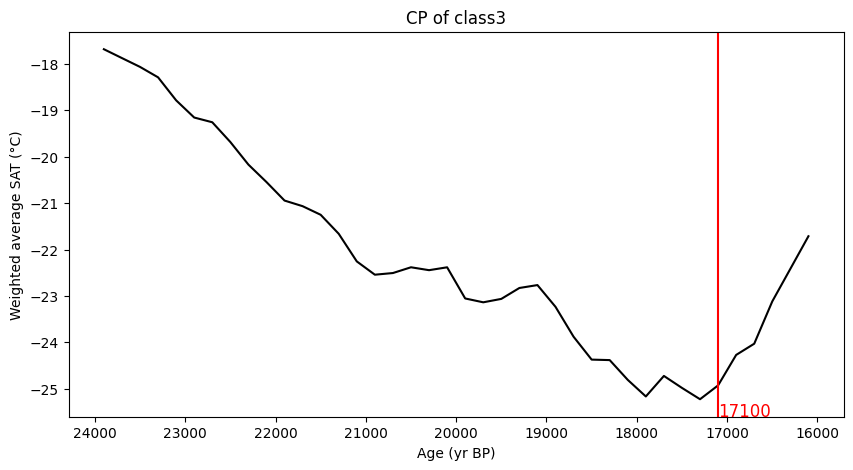

In [24]:
from toolbox import change_point_functions as cpf
unsorted_cp={}
for i in range(len(uncor_weighted_avg)):
    cp_climo_info=cpf.find_cp(uncor_weighted_avg[i], ds_GMM_climo['age'].values, avg_plot=True, avg_plot_title=f'CP of class{i}')
    unsorted_cp[i]=cp_climo_info['cp_age']


# Store the cp_climo_info

In [13]:
# save the 'cp_climo_info'
import pickle
pickle.dump(unsorted_cp, open('climo_ana_data/cp_climo_info.pkl', 'wb'))


In [14]:
# load the cp_climo_info
import pickle
unsorted_cp = pickle.load(open('climo_ana_data/cp_climo_info.pkl', 'rb'))

# Sort the class label according to the cps

In [25]:
from toolbox import change_point_functions as cpf
relabeled_cp, match = cpf.sort_classes_by_cp_age(unsorted_cp)
print("Relabeled Classes:", relabeled_cp)
print("Match Between Unsorted and Sorted Classes:", match)

Relabeled Classes: {0: 21100.0, 1: 17100.0, 2: 17100.0, 3: 17100.0}
Match Between Unsorted and Sorted Classes: {0: 0, 1: 1, 2: 2, 3: 3}


# Relabel the class_label

In [26]:
import numpy as np

ds_GMM_climo_relabeled = ds_GMM_climo.copy()

# Convert the class_label data into a numpy array to work with it directly
original_class_labels = ds_GMM_climo['class_label'].values

# Create a new array for relabeled class labels based on the match dictionary
relabeled_class_labels = np.vectorize(match.get)(original_class_labels)

# Add the new relabeled class labels as a data variable to the dataset
ds_GMM_climo_relabeled['class_relabeled'] = (('lat', 'lon'), relabeled_class_labels)

In [13]:
ds_GMM_climo_relabeled

<xarray.Dataset>
Dimensions:                (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * age                    (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_std                (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    weight                 (lat) float32 ...
    sat_centered_weighted  (age, lat, lon) float32 ...
    class_label            (lat, lon) int64 ...
    class_relabeled        (lat, lon) int32 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2

In [17]:
# store the ds_GMM_climo_relabeled
ds_GMM_climo_relabeled['lat'].encoding['missing_value'] = np.nan
ds_GMM_climo_relabeled['lon'].encoding['missing_value'] = np.nan
ds_GMM_climo_relabeled.to_netcdf('climo_ana_data/ds_GMM_climo_relabeled.nc')

In [1]:
# load the ds_GMM_climo_relabeled
import xarray as xr
ds_GMM_climo_relabeled = xr.open_dataset('climo_ana_data/ds_GMM_climo_relabeled.nc')

# Plot the spatial distribution of labels

In [29]:
ds_GMM_climo_relabeled_crop=ds_GMM_climo_relabeled.copy()
ds_GMM_climo_relabeled_crop.to_netcdf('climo_ana_data/ds_GMM_climo_relabeled_crop.nc')

In [32]:
# load the ds_GMM_climo_relabeled_crop
import xarray as xr
ds_GMM_climo_relabeled_crop = xr.open_dataset('climo_ana_data/ds_GMM_climo_relabeled_crop.nc')

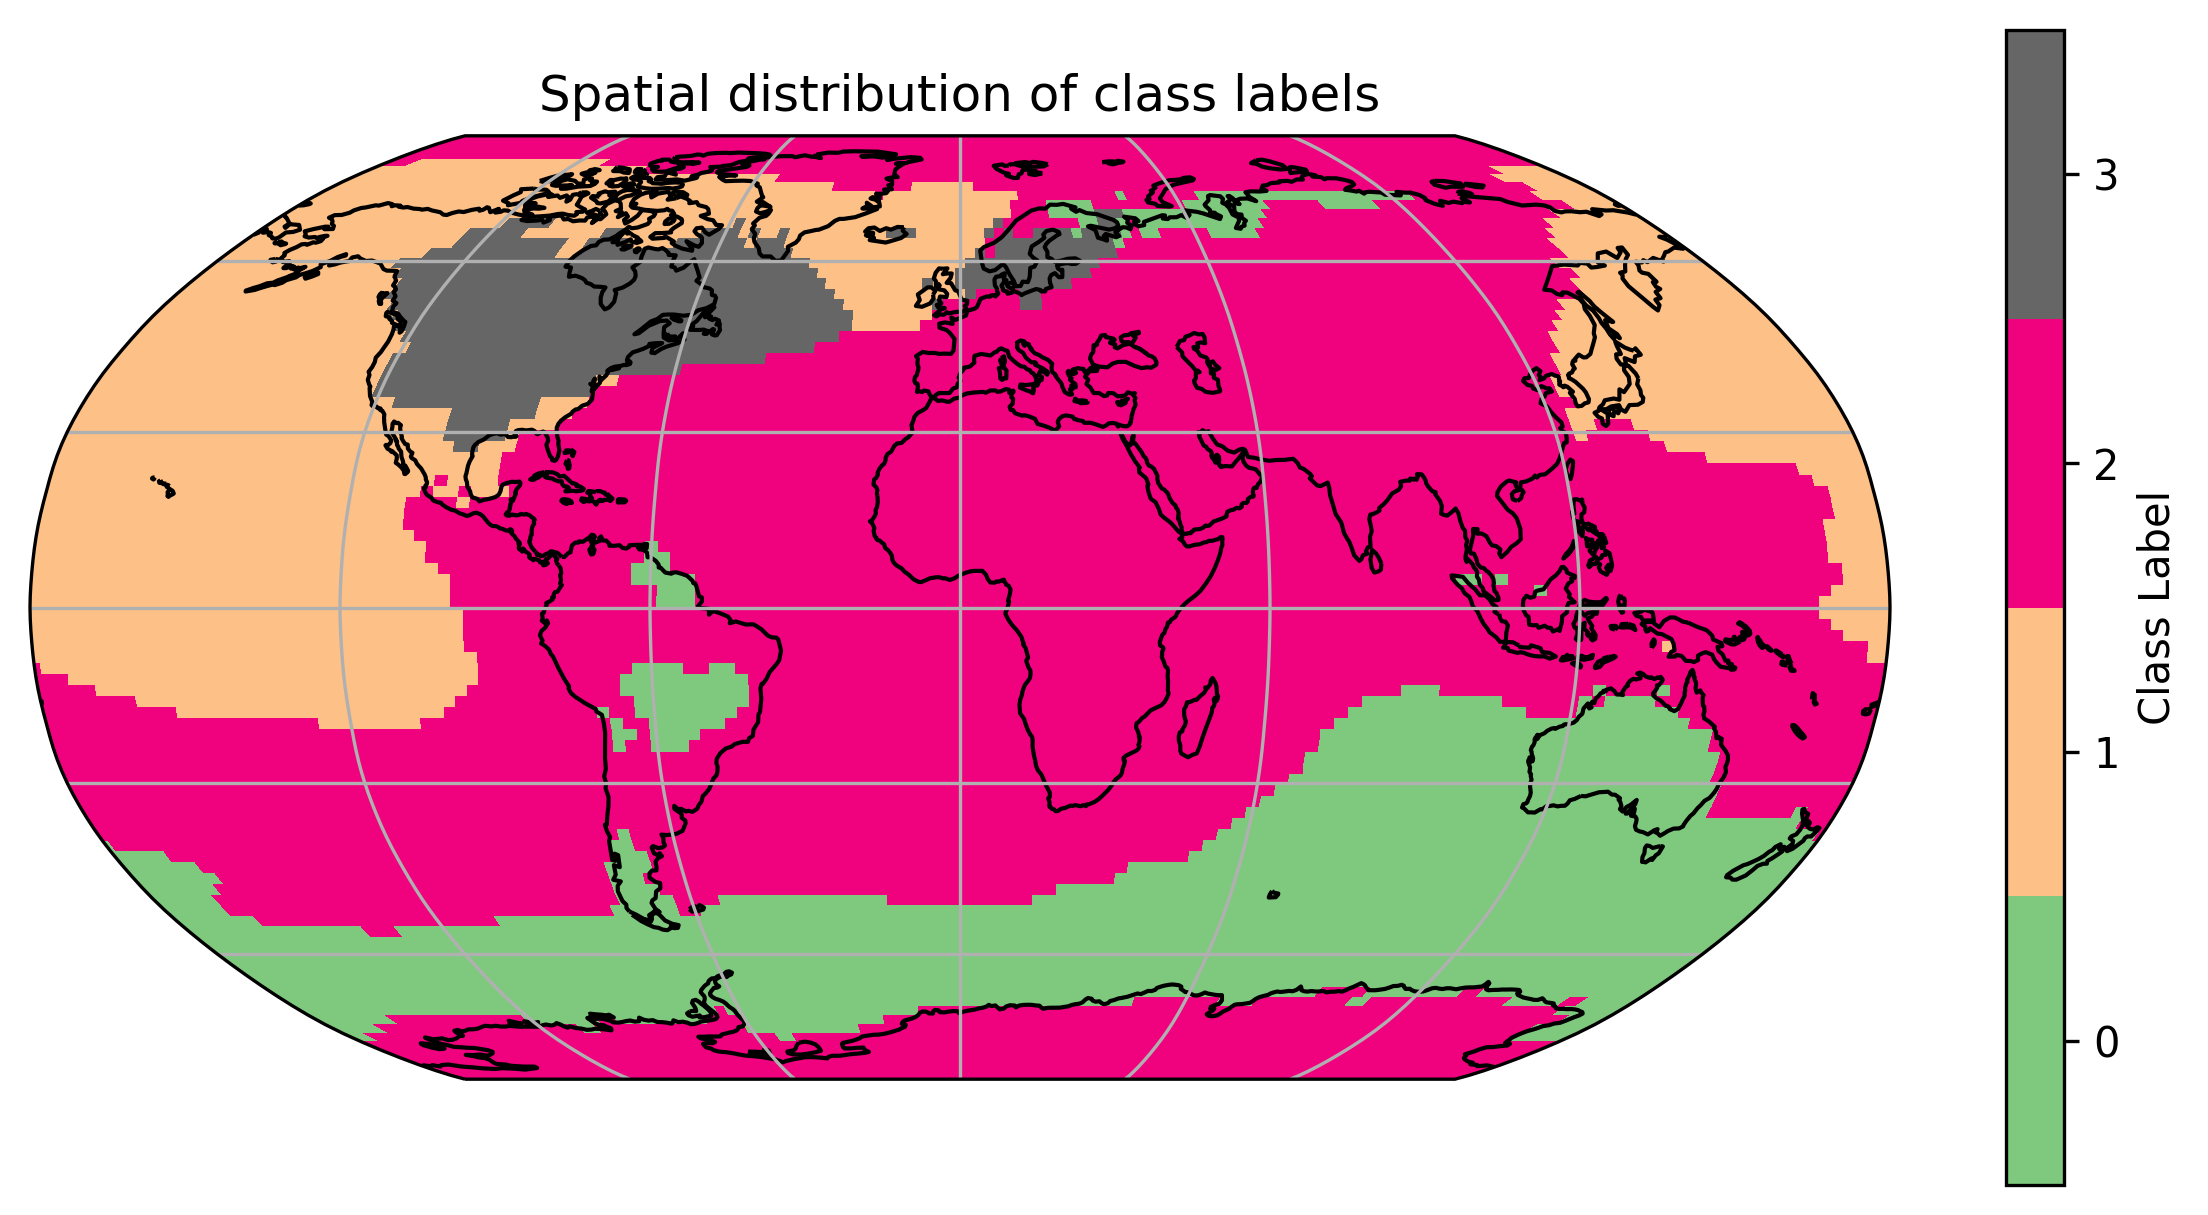

In [33]:

from toolbox import GMM_functions_single as gfs
gfs.plot_labels(ds_GMM_climo_relabeled_crop,label_var_name='class_relabeled')

# Plot average curves

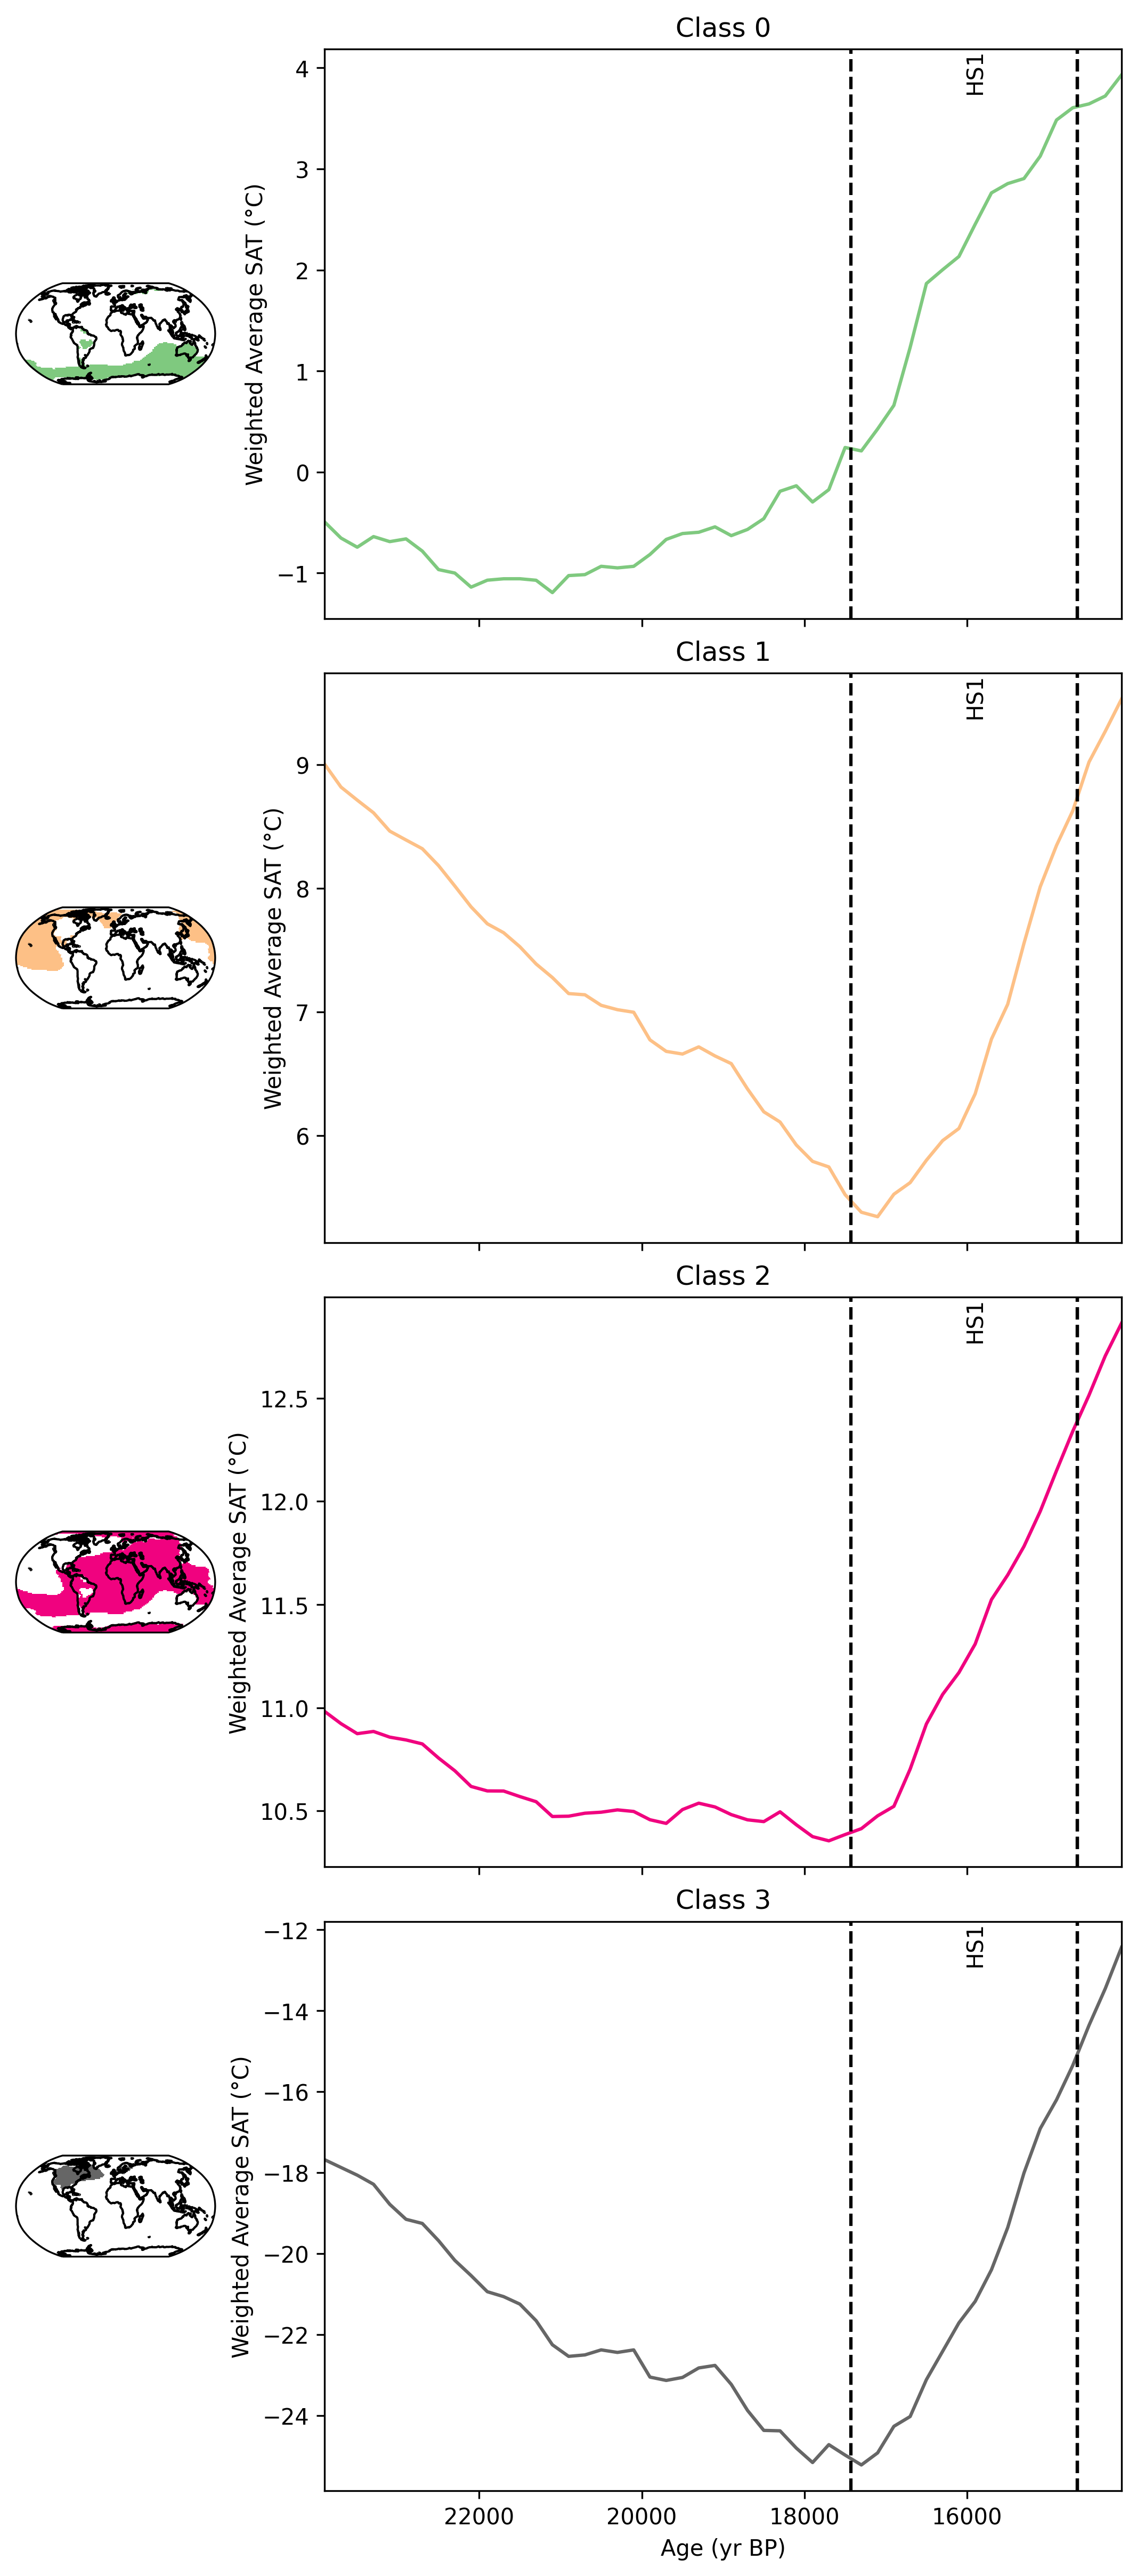

In [28]:
from toolbox import GMM_functions_single as gfs
uncor_weighted_avg=gfs.plot_weighted_average_curve(ds_GMM_climo_relabeled_crop.copy(),label_var_name='class_relabeled', dpi=300)

# Relabel the average curves

In [2]:
from toolbox import change_point_functions as cpf
ds_GMM_climo_relabeled=cpf.cal_anomalies(ds_GMM_climo_relabeled,2000)

relabeled_weighted_avg = {}
for i in range(4):
    relabeled_weighted_avg[i] = cpf.cal_weighted_average_curve(ds_GMM_climo_relabeled, i, sat_var_name='sat_anomalies',class_label_name='class_relabeled')

In [21]:
# relabeled_weighted_avg = {}

# for old_key, new_key in match.items():
#     if old_key in uncor_weighted_avg:
#         # Assign the array from the old key to the new key in the new dictionary
#         relabeled_weighted_avg[new_key] = uncor_weighted_avg[old_key]


In [5]:
# save the relabeled_weighted_avg
import pickle
pickle.dump(relabeled_weighted_avg, open('climo_ana_data/relabeled_weighted_avg.pkl', 'wb'))


In [6]:
# read the relabeled_weighted_avg
import pickle
relabeled_weighted_avg = pickle.load(open('climo_ana_data/relabeled_weighted_avg.pkl', 'rb'))


INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast.irreg(),set print.options = 0 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast.irreg(),      set quiet = 1 

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 55
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 (unknown unit)
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Error (experimental) is fitted instead of Y=Trend+Error 
Detrend       : False | I

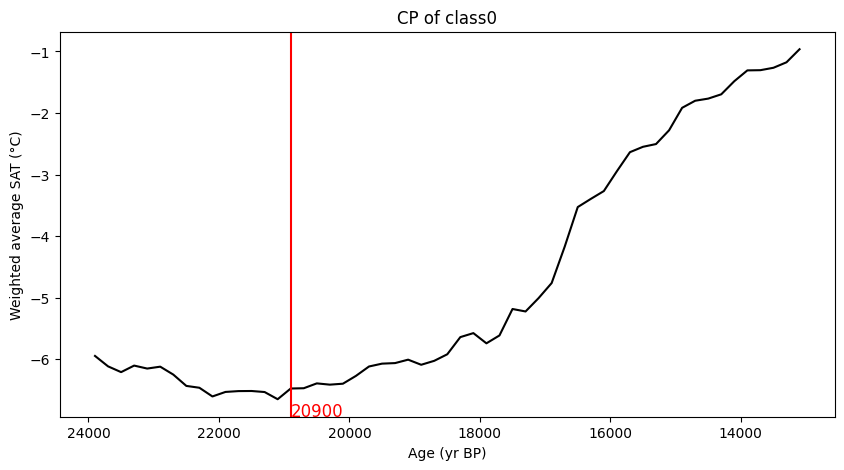

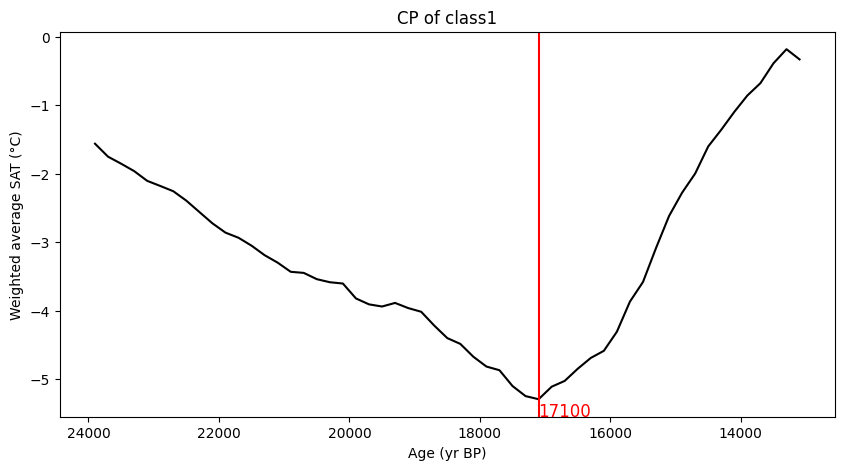

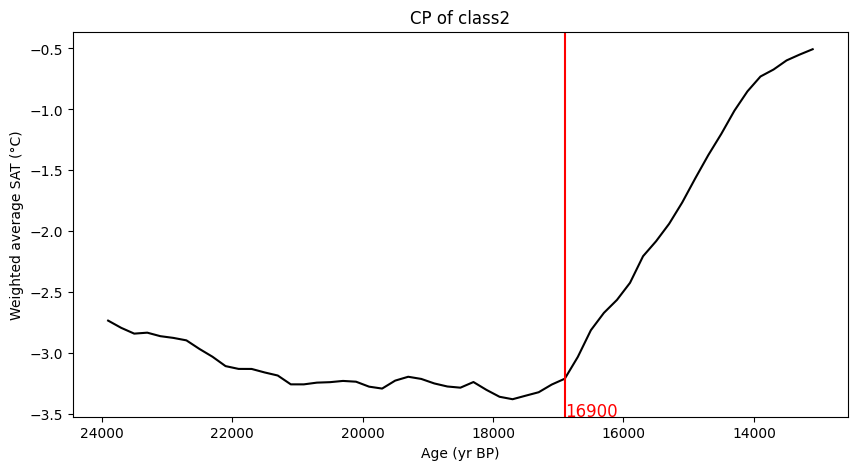

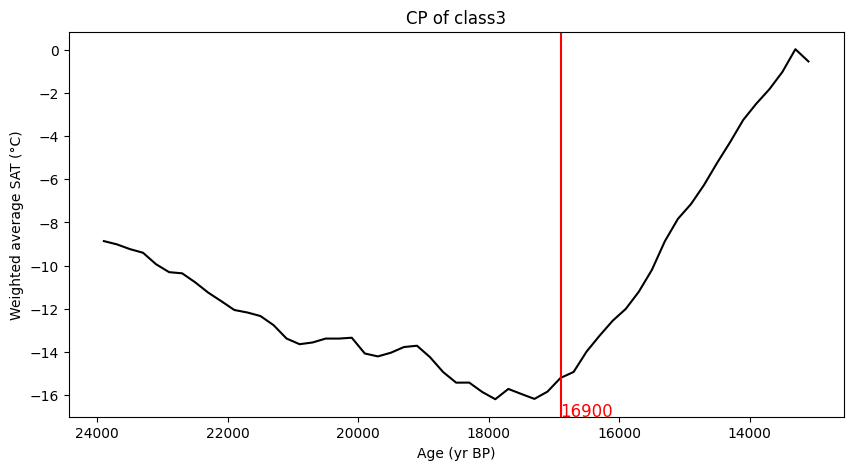

In [4]:
from toolbox import change_point_functions as cpf

for i in range(len(relabeled_weighted_avg)):
    cp_climo_info_relabeled=cpf.find_cp(relabeled_weighted_avg[i], ds_GMM_climo_relabeled['age'].values, avg_plot=True, avg_plot_title=f'CP of class{i}')

# GMM on the sklearn PCA results

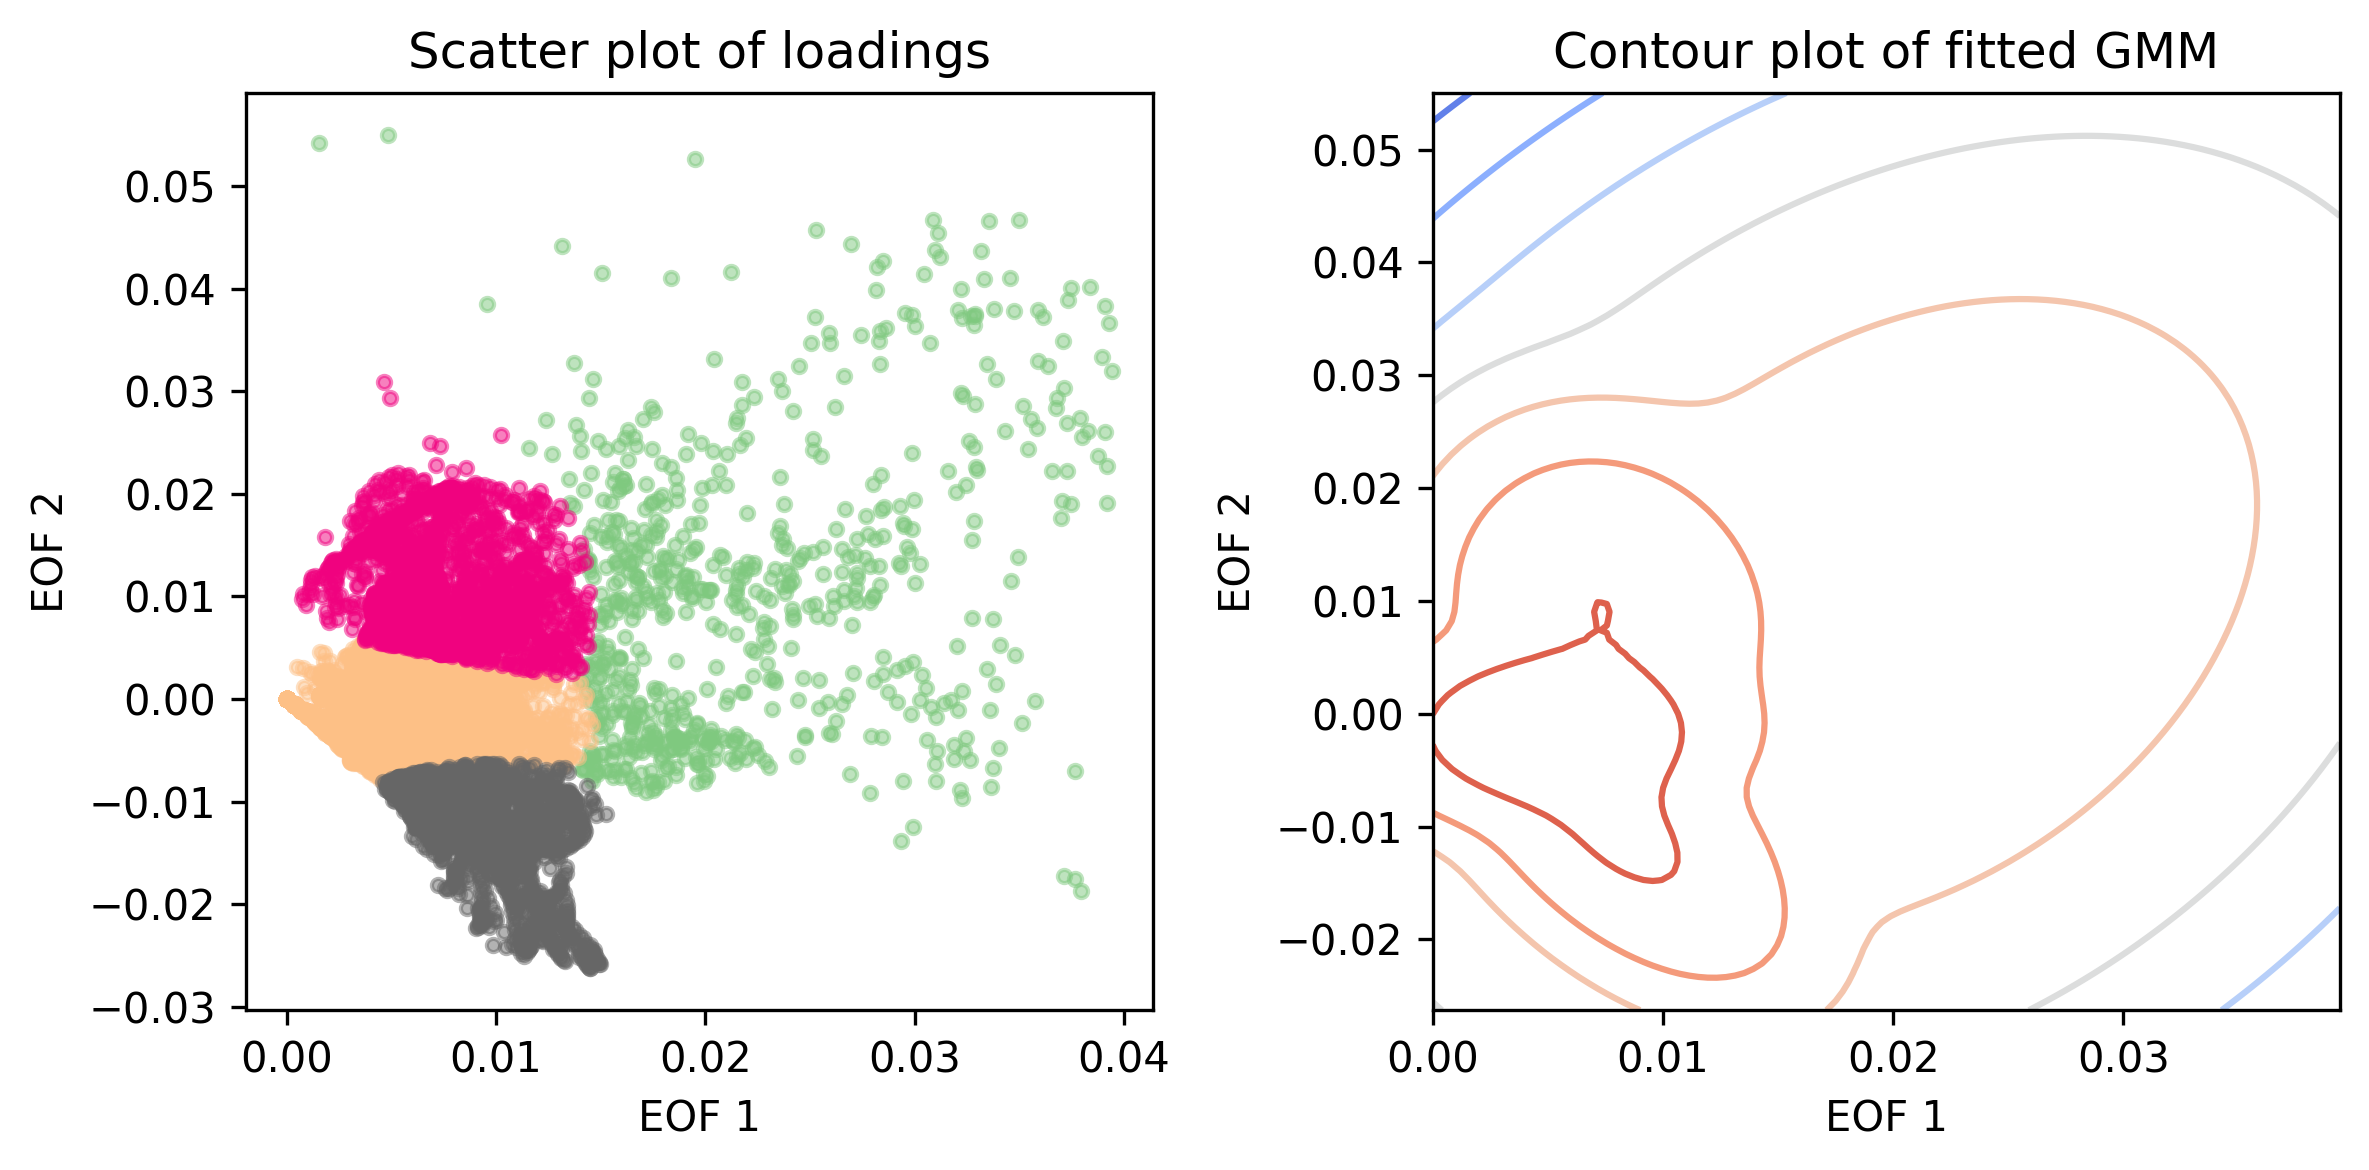

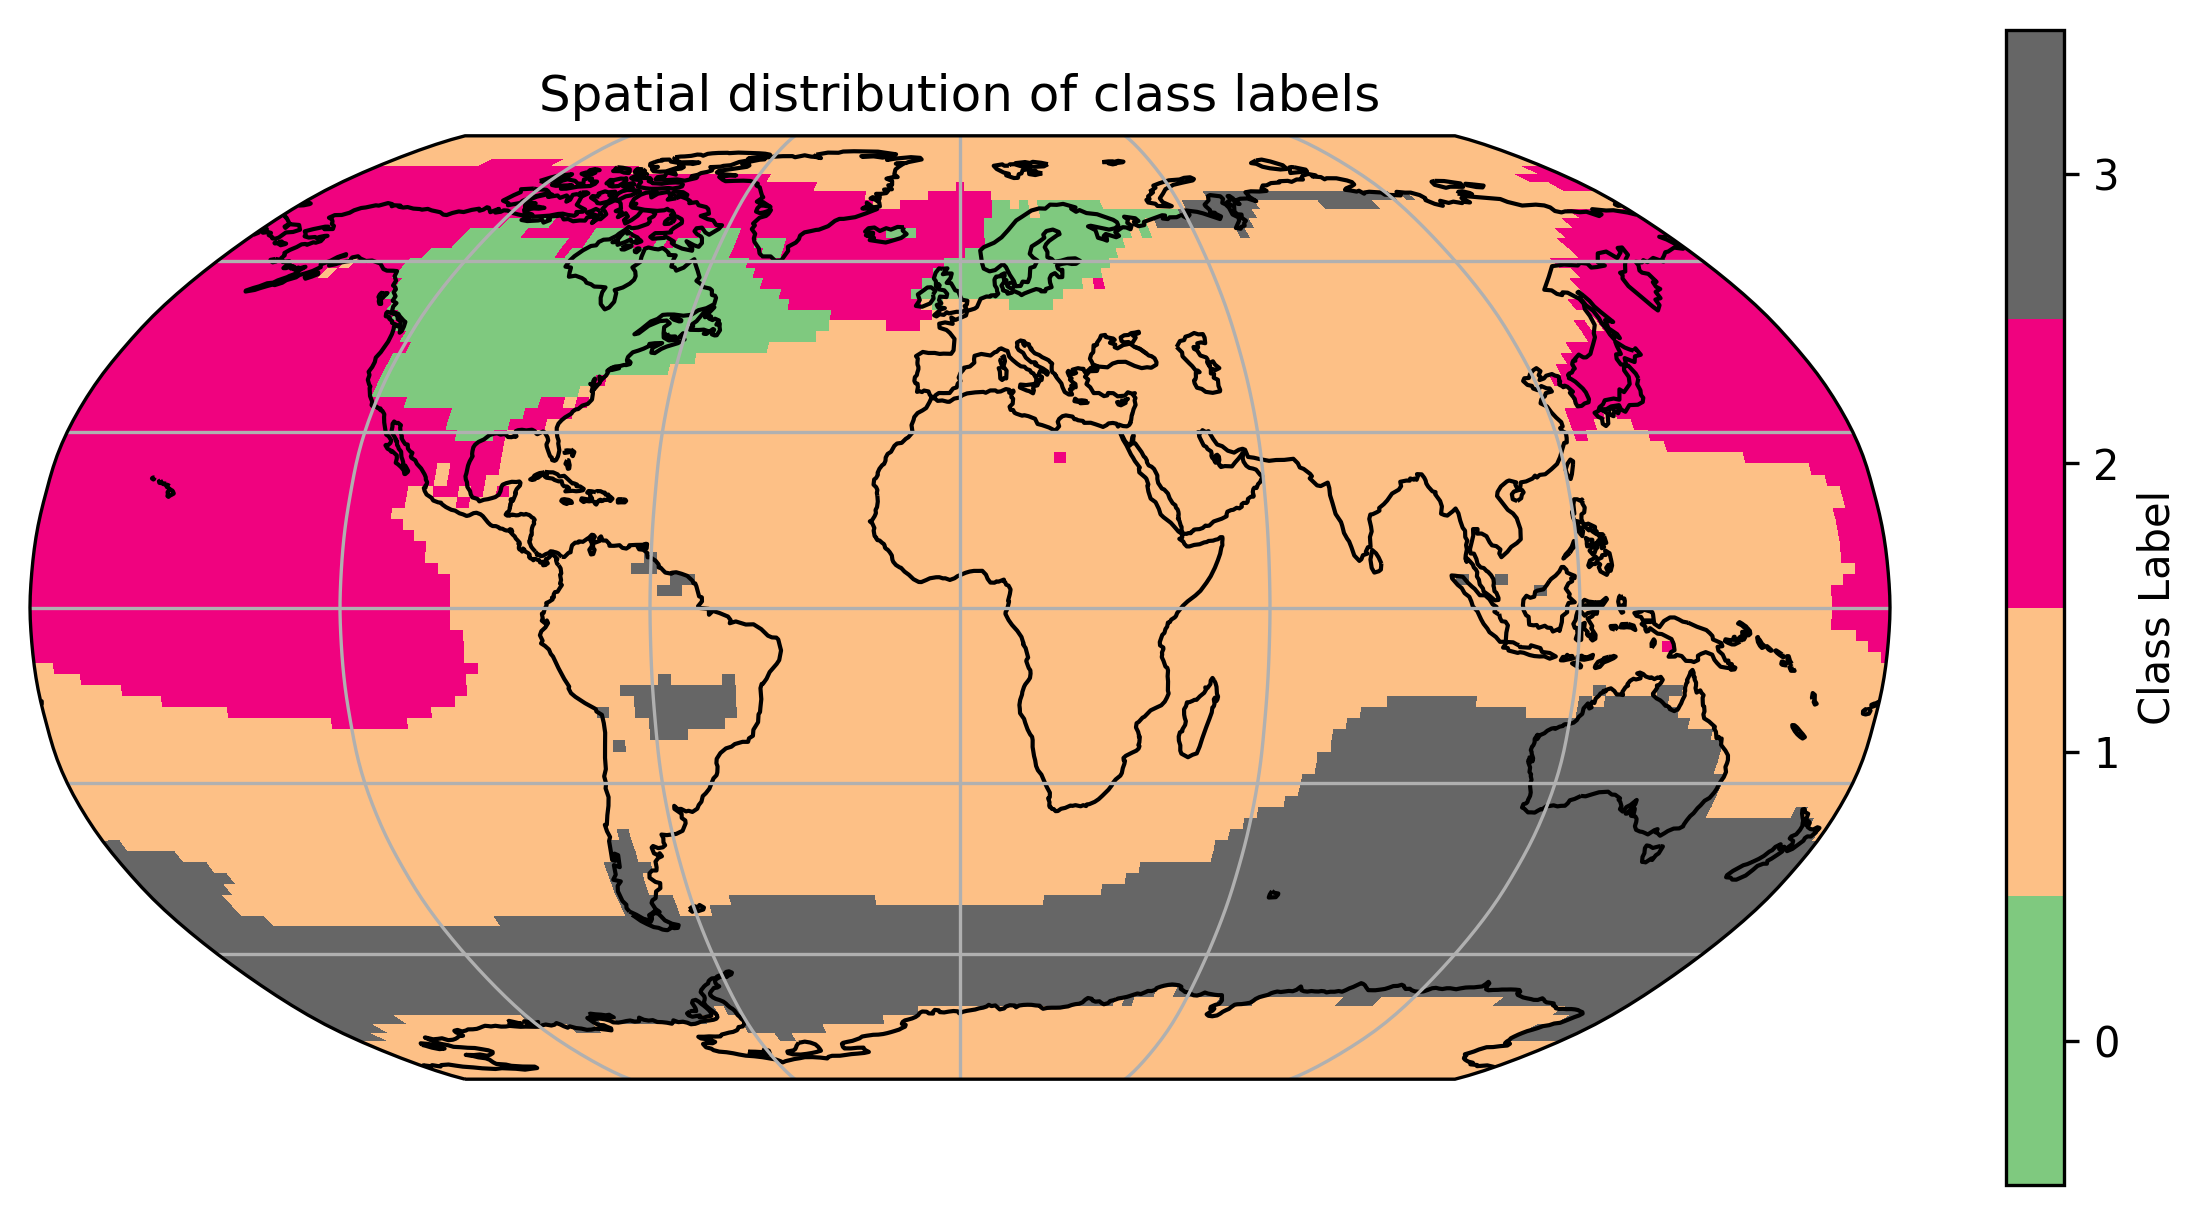

In [6]:
from toolbox import GMM_functions_single as gfs
ds_EOFs_GMM=gfs.GMM4EOFS(eofs_climo_sk, ds_sat,n_components=4)
gfs.plot_labels(ds_EOFs_GMM)